In [1]:
STUDY_NAME = 'Subsea_Study[7]'

# All cycle

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

from utils import *
from models import *
from classes import *
import config

Using TensorFlow backend.


In [3]:
ROOT = config.ROOT
ROOT_SLASH = config.ROOT_SLASH
DATA_PATH = config.DATA_PATH

STUDY_PATH = f'{DATA_PATH}/{STUDY_NAME}'
GEN_DFS_PATH = f'{STUDY_PATH}/gens'
TPL_PATH = f'{ROOT_SLASH}\\olga_proj\\{STUDY_NAME}'

REAL_FILE = config.REAL_FILE
REAL_FILE_ALL = config.REAL_FILE_ALL

TRAIN_VAL_RATIO_REAL = config.TRAIN_VAL_RATIO_REAL
TRAIN_VAL_RATIO_GEN = config.TRAIN_VAL_RATIO_GEN
N_STEPS = config.N_STEPS
N_FEATURES_IN = config.N_FEATURES_IN
N_FEATURES_OUT = config.N_FEATURES_OUT

pd.options.display.max_columns = 25

STUDY_PATH, GEN_DFS_PATH, REAL_FILE, TPL_PATH, TRAIN_VAL_RATIO_REAL, TRAIN_VAL_RATIO_GEN

('C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/gens',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/real.csv',
 'C:\\Users\\Asus\\Desktop\\Skoltech\\Multiphase flows\\olga_proj\\Subsea_Study[7]',
 0.3333333333333333,
 0.8)

## AdaBoost

Train error:      21.638
Test error:       26.694
Training time:    9.440 s

train/all: 0.9
n_steps: 5
n_features_in: 6, n_features_out: 3
loss metric: mae
layers: 3, neurons: 100, droupout: 0.2
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/AB-4.hdf saved


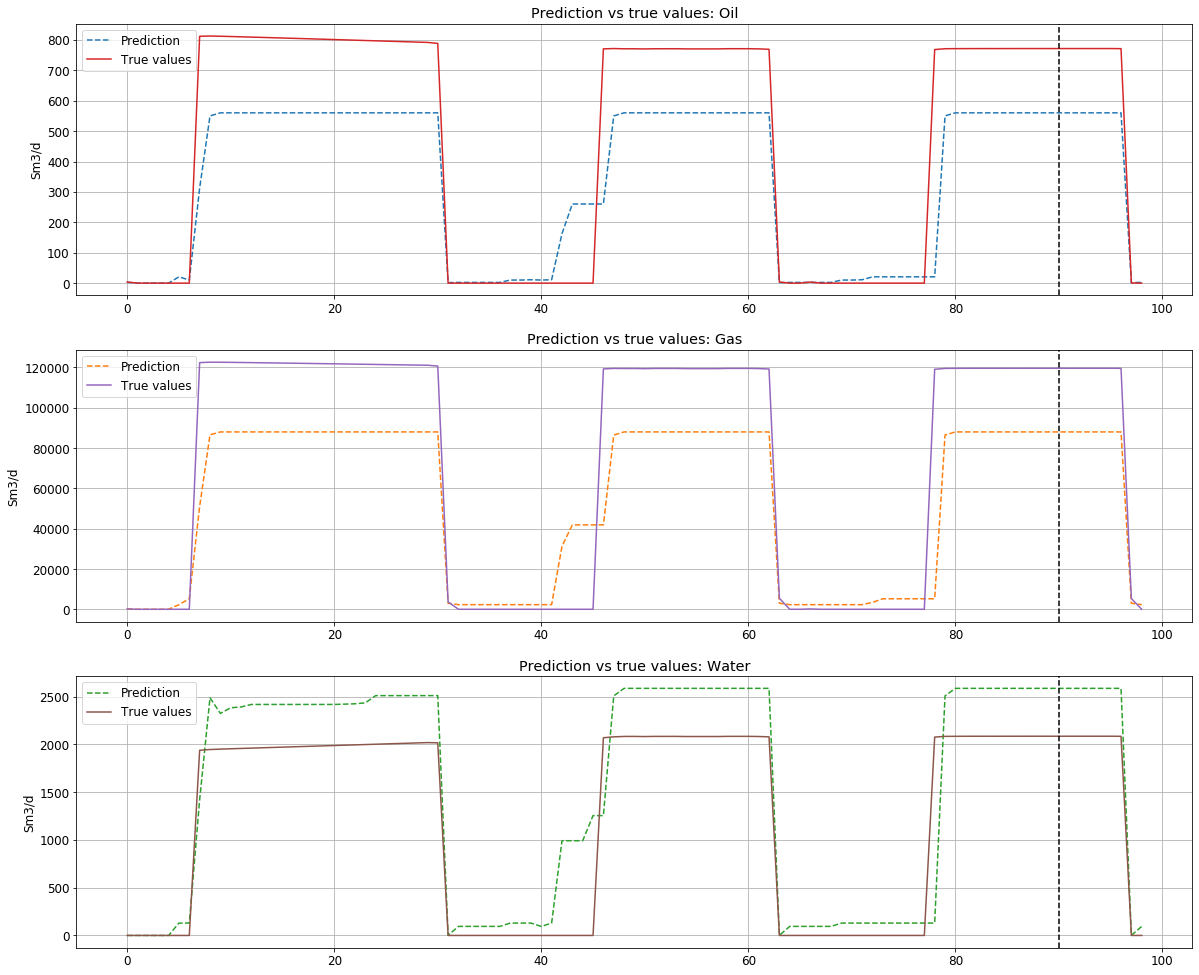

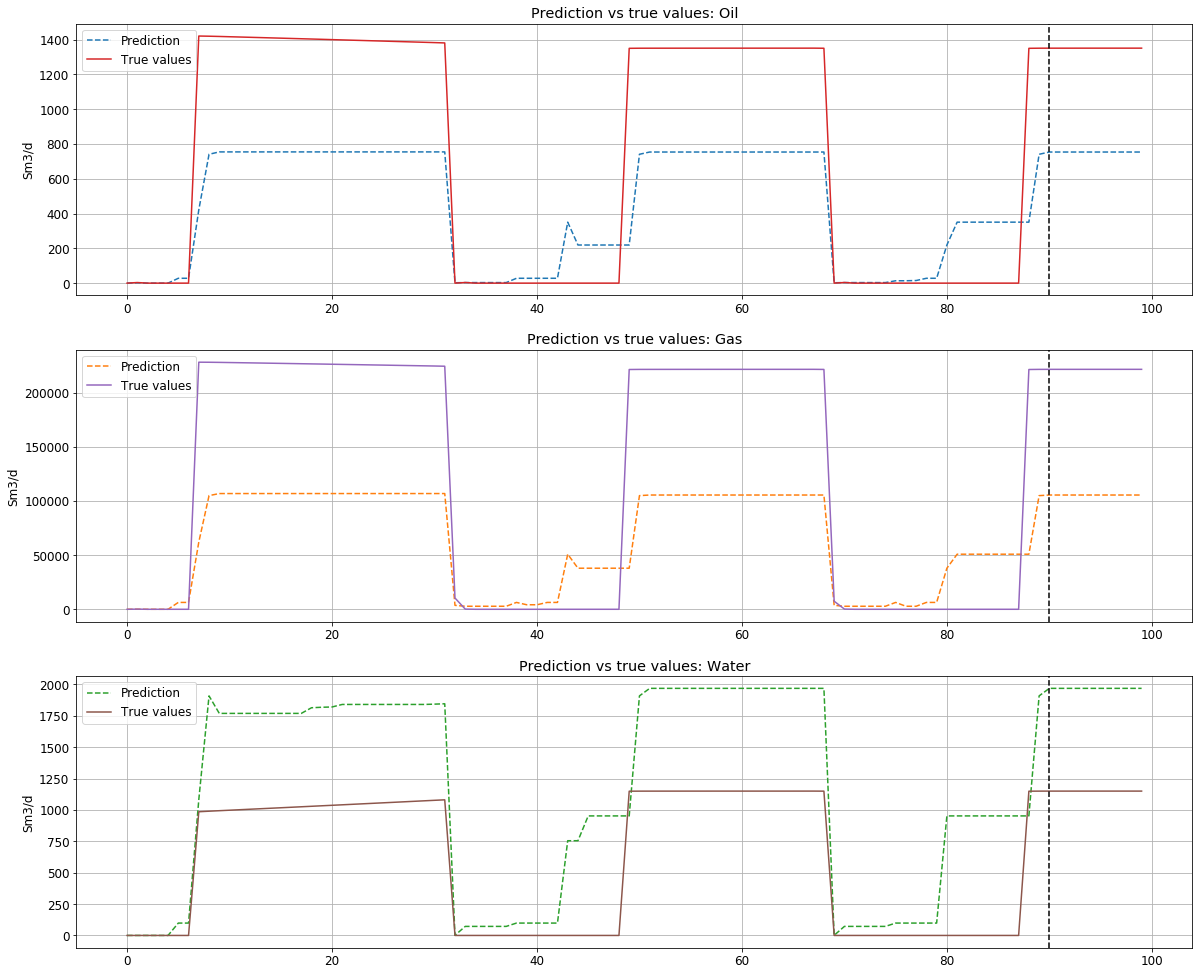

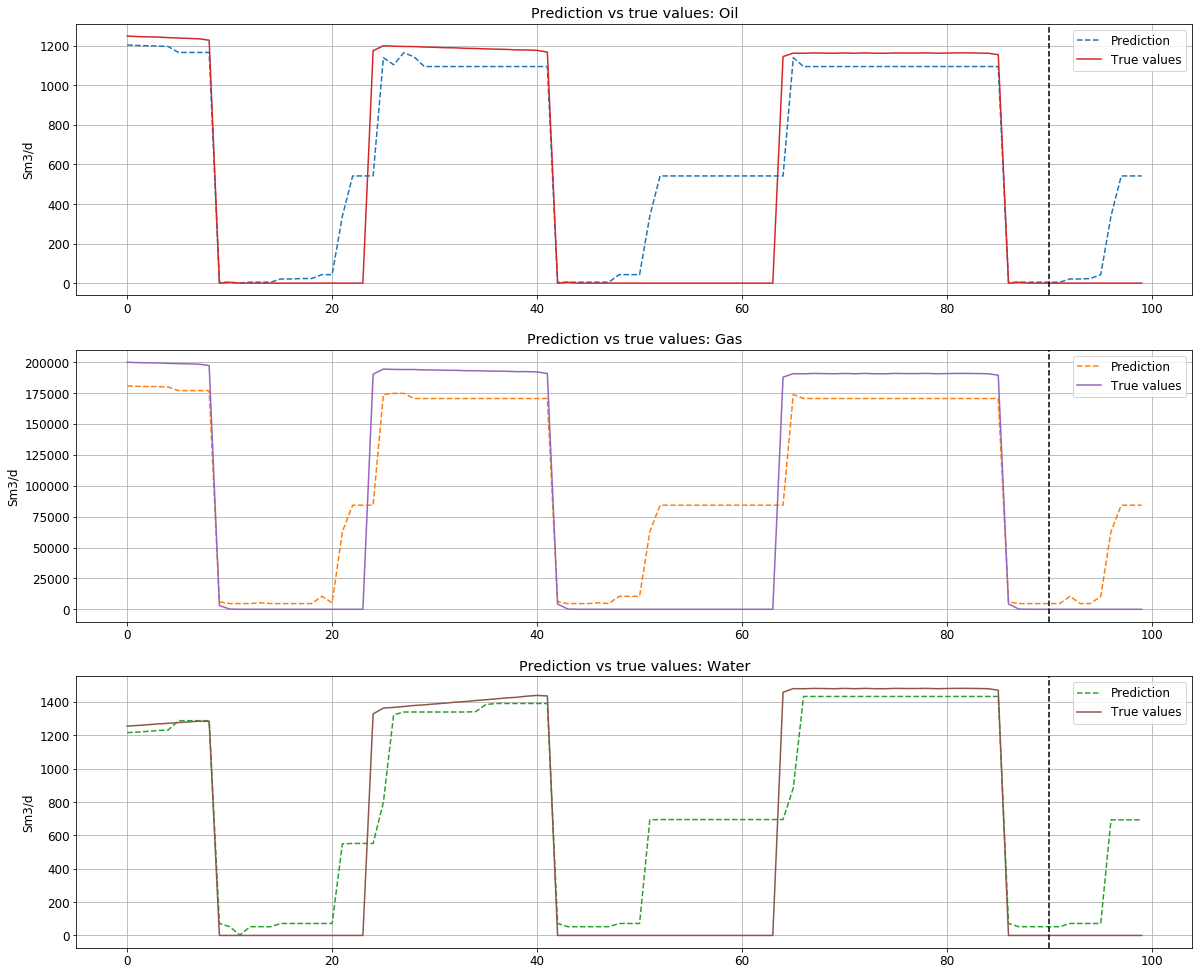

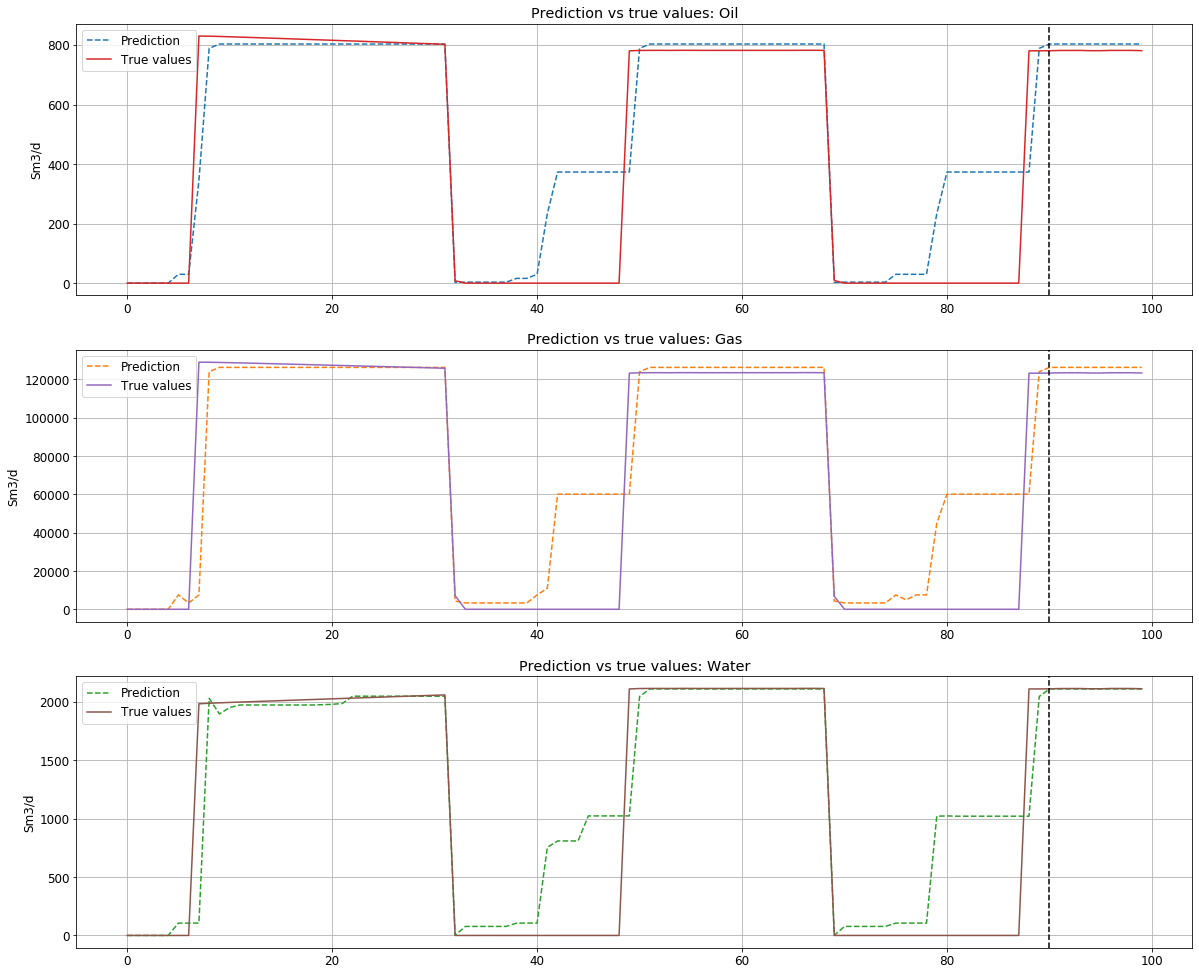

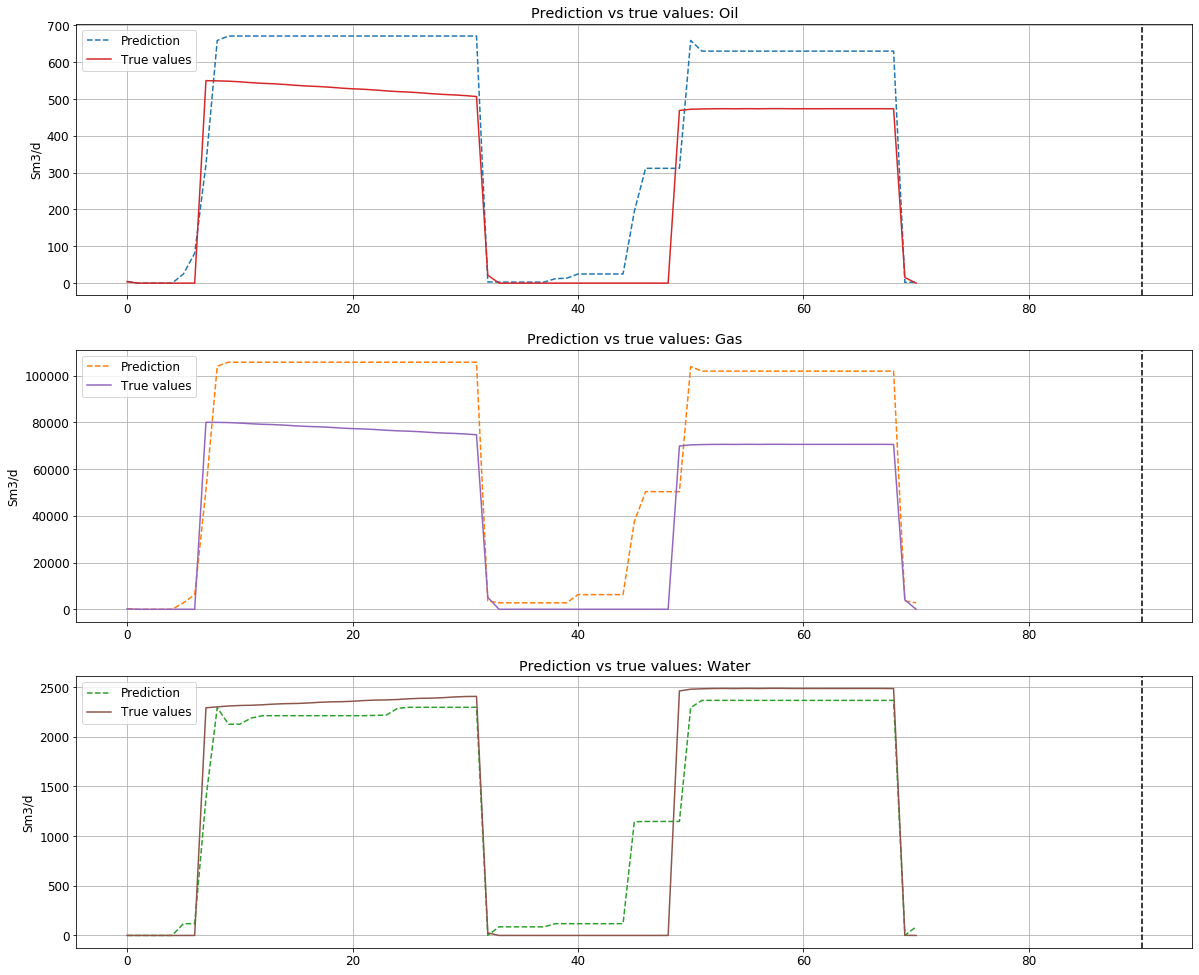

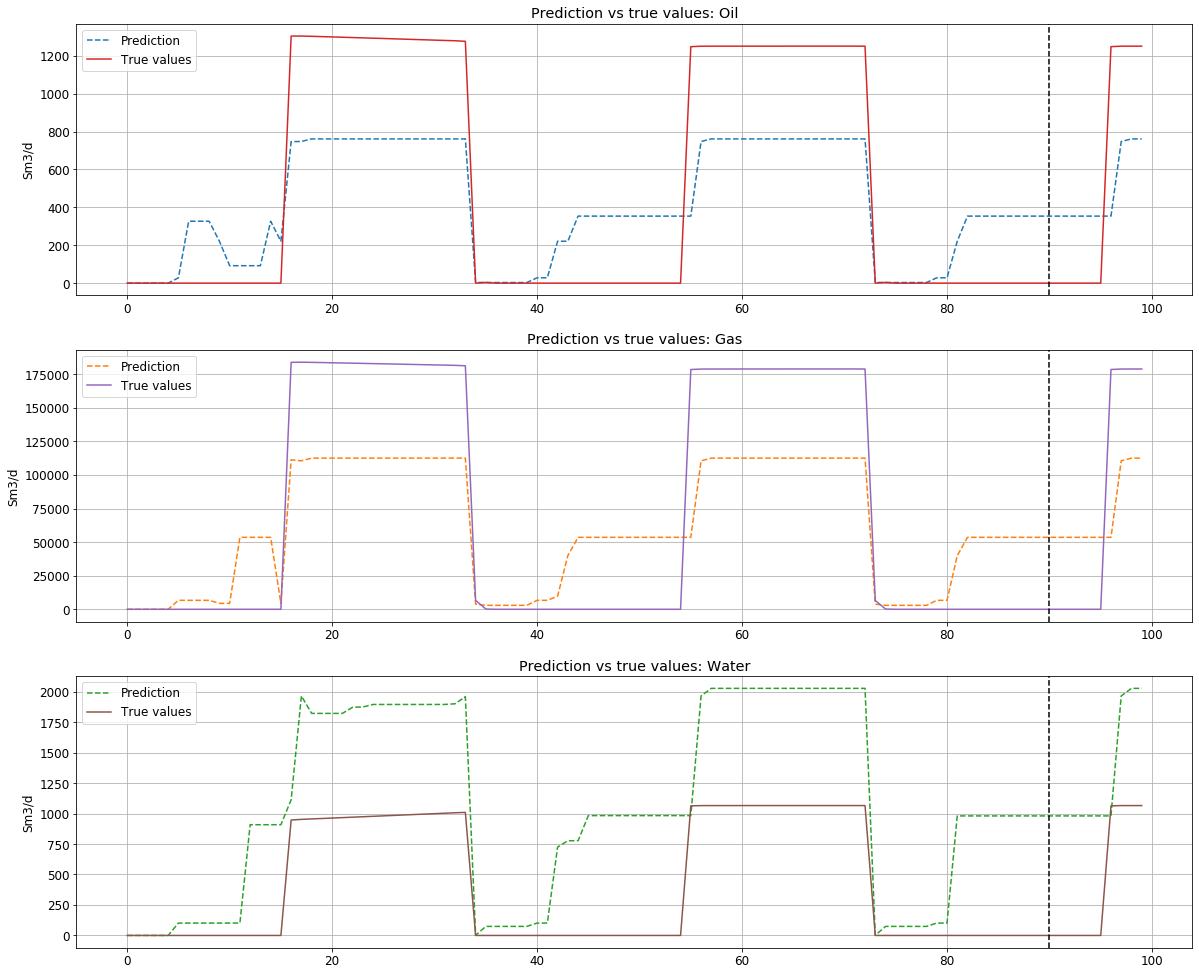

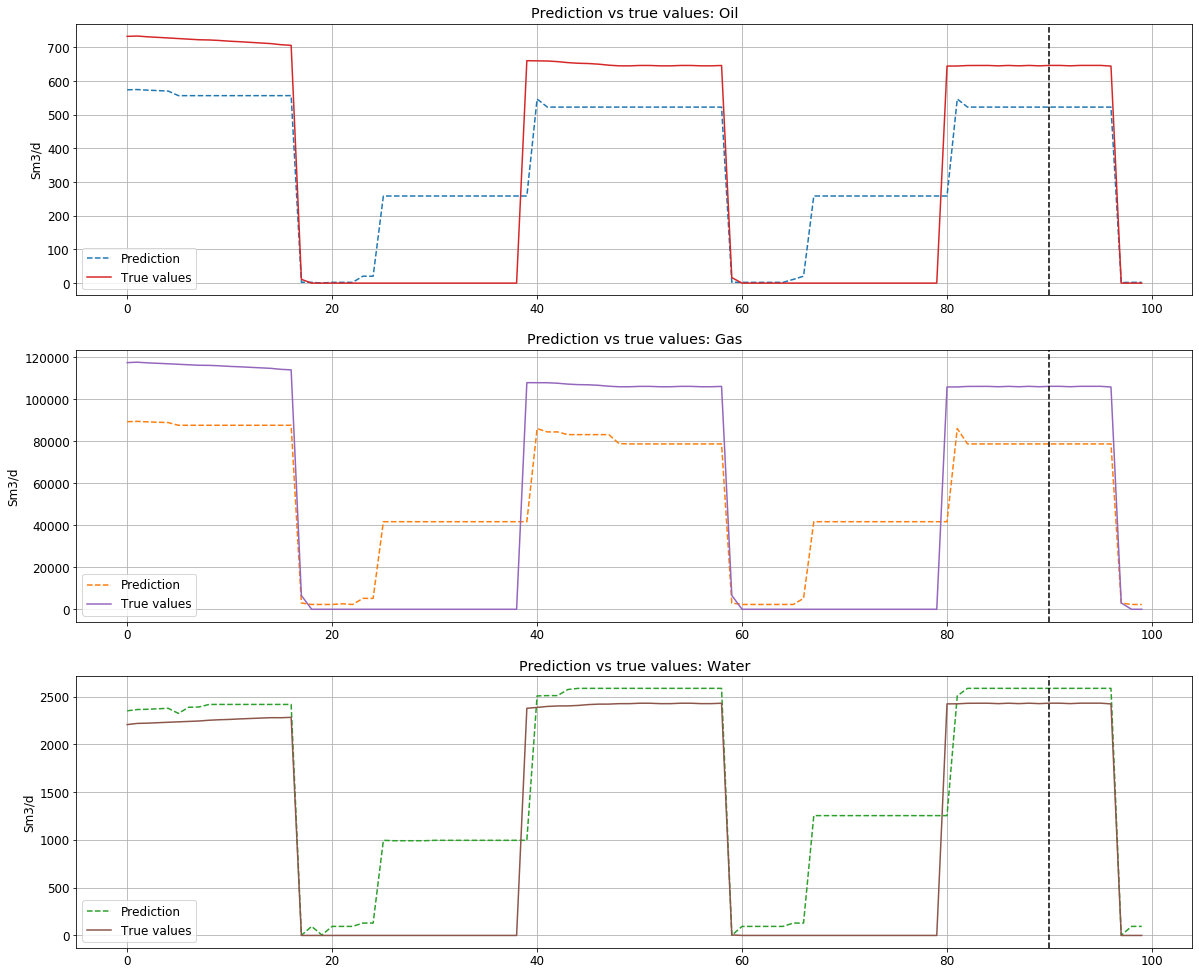

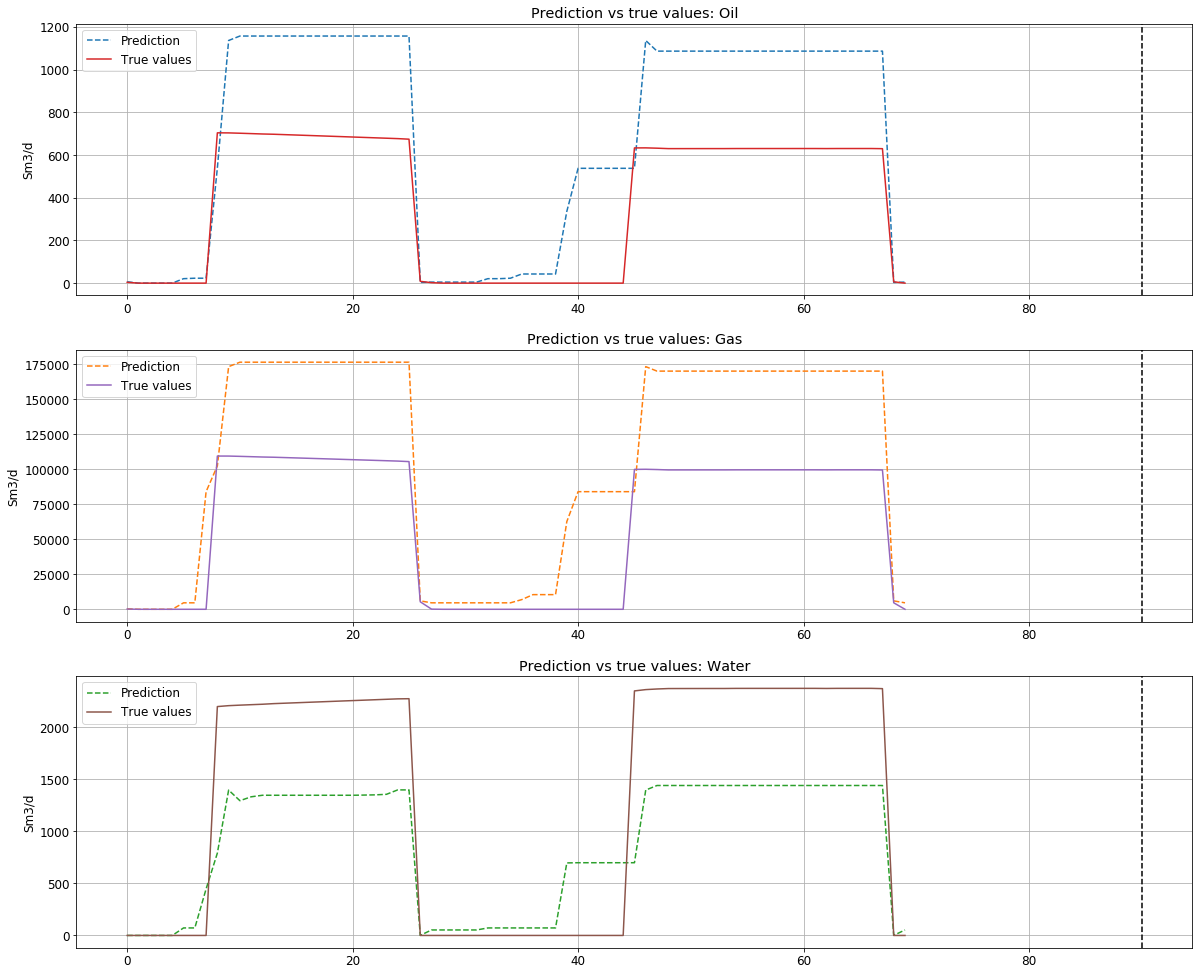

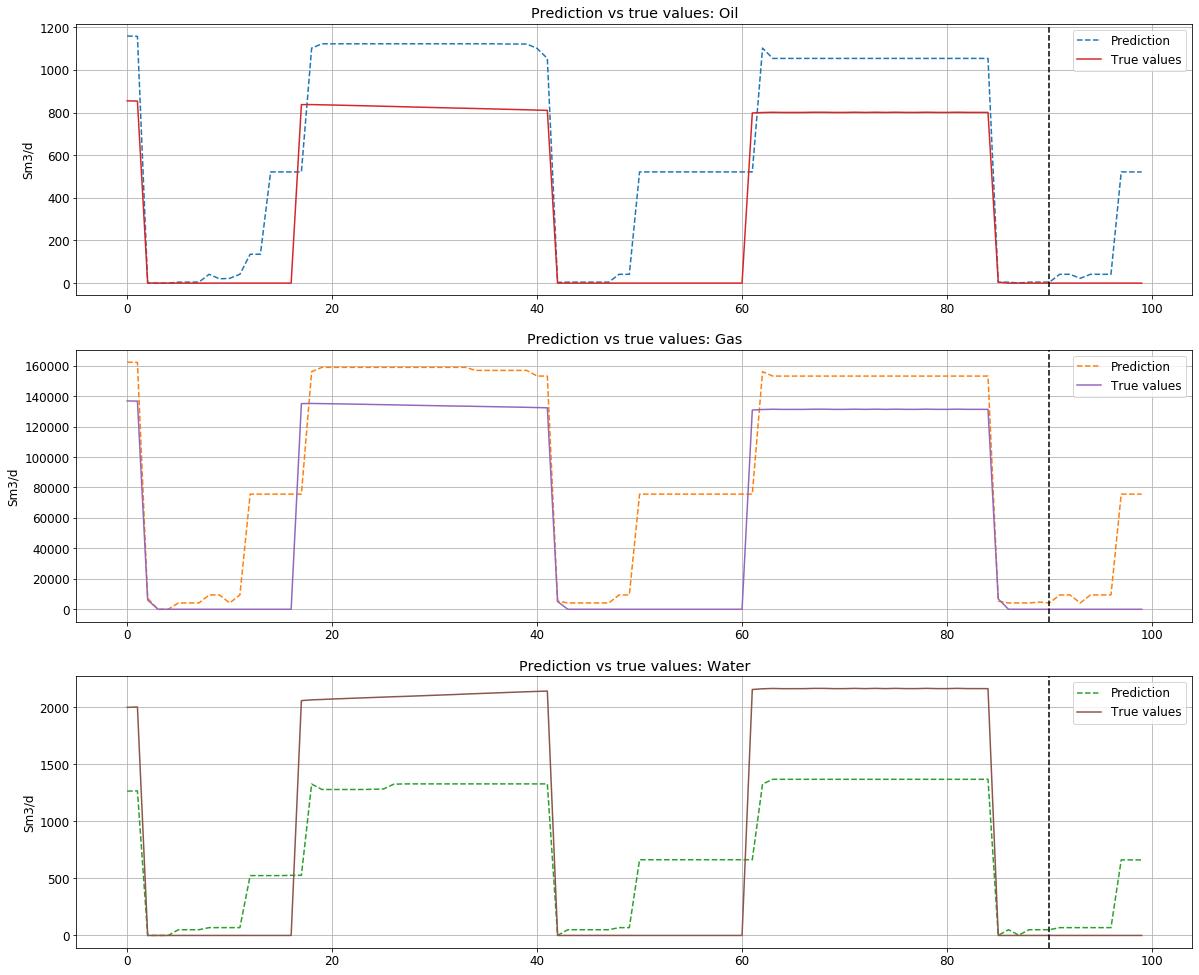

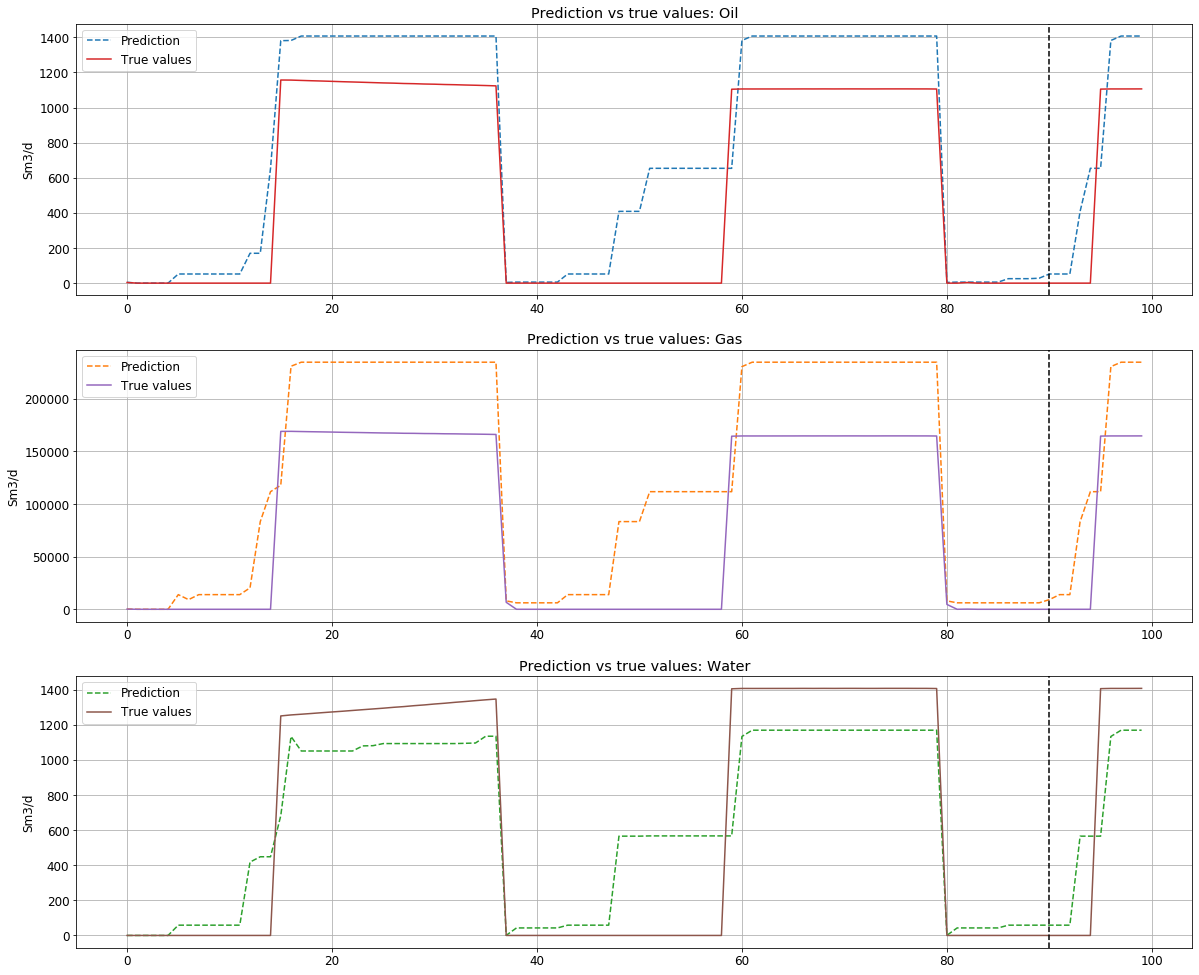

In [8]:
m = Gen(model_name='AB-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=9/10,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae',
         n_neurons=100)

m.train()
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.save()

In [9]:
n_experiments = 10
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='AB-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=1/3)

    m.train(tuning=True, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 10.46+-0.29


## RF

305 out of 478 (63.8%) without errors
which means
305 out of 551 (55.4%) without errors total
Train error:      17.186
Test error:       10.881
Training time:    69.600 s

train/all: 0.8
n_steps: 5
n_features_in: 6, n_features_out: 3
loss metric: mae
layers: 3, neurons: 100, droupout: 0.2
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/RF-4.hdf saved


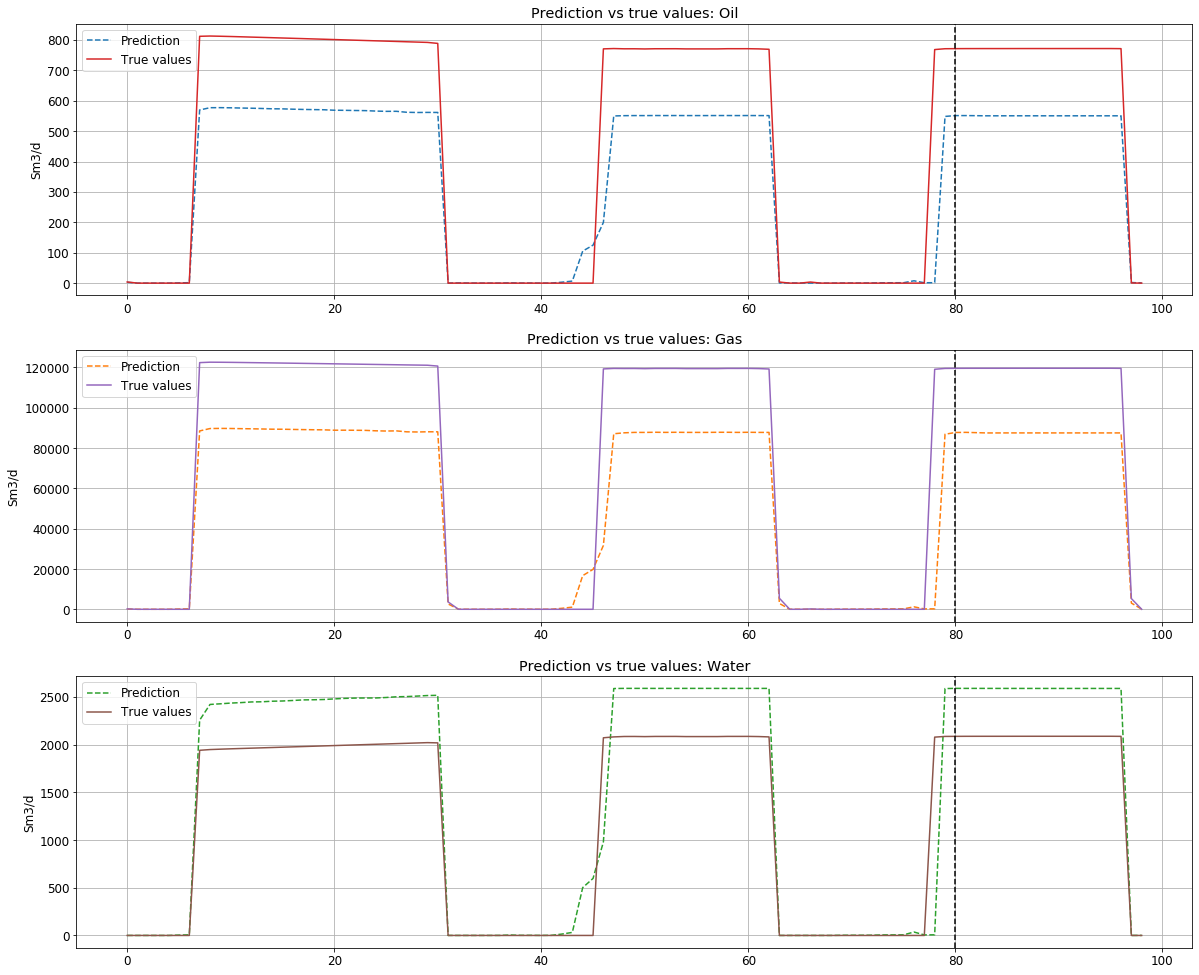

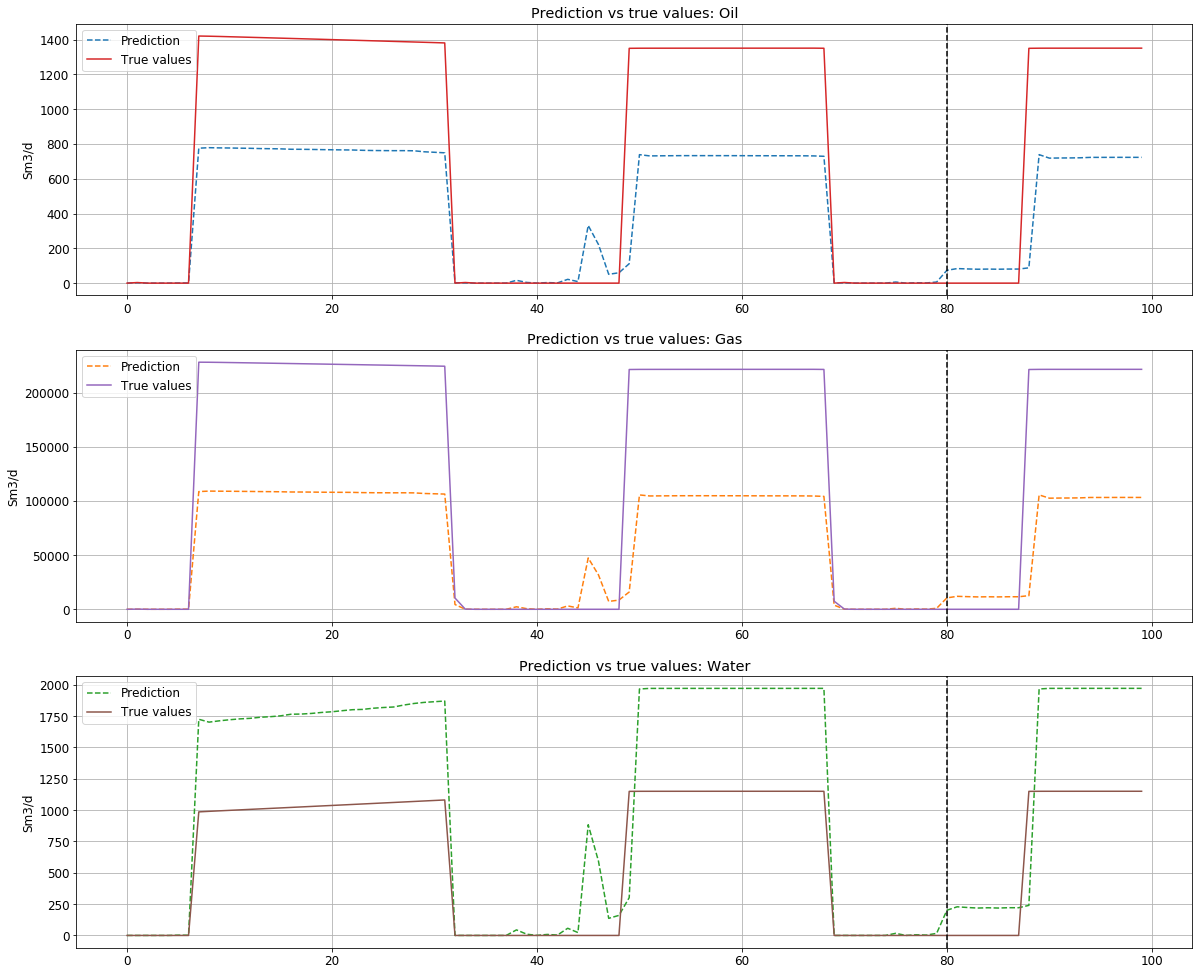

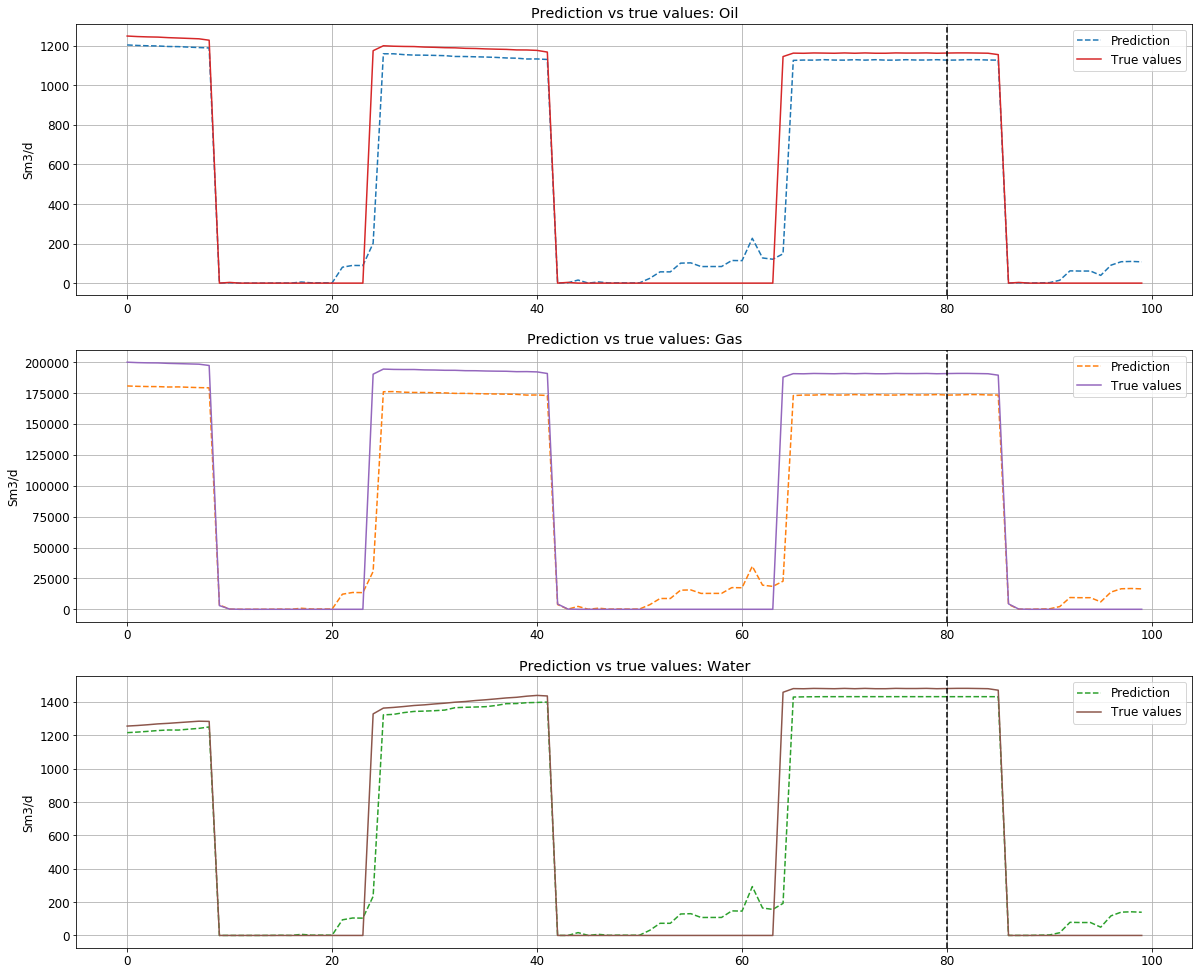

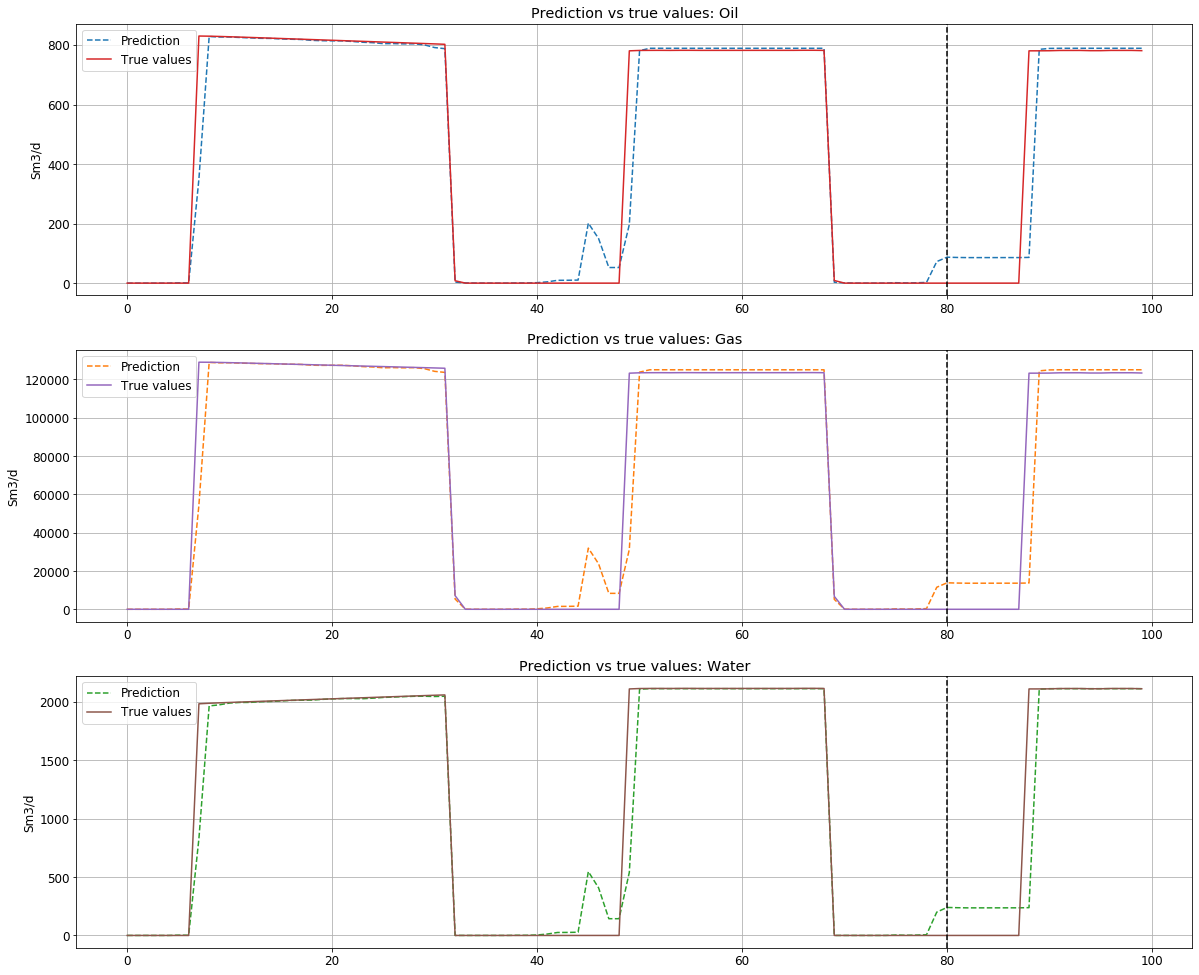

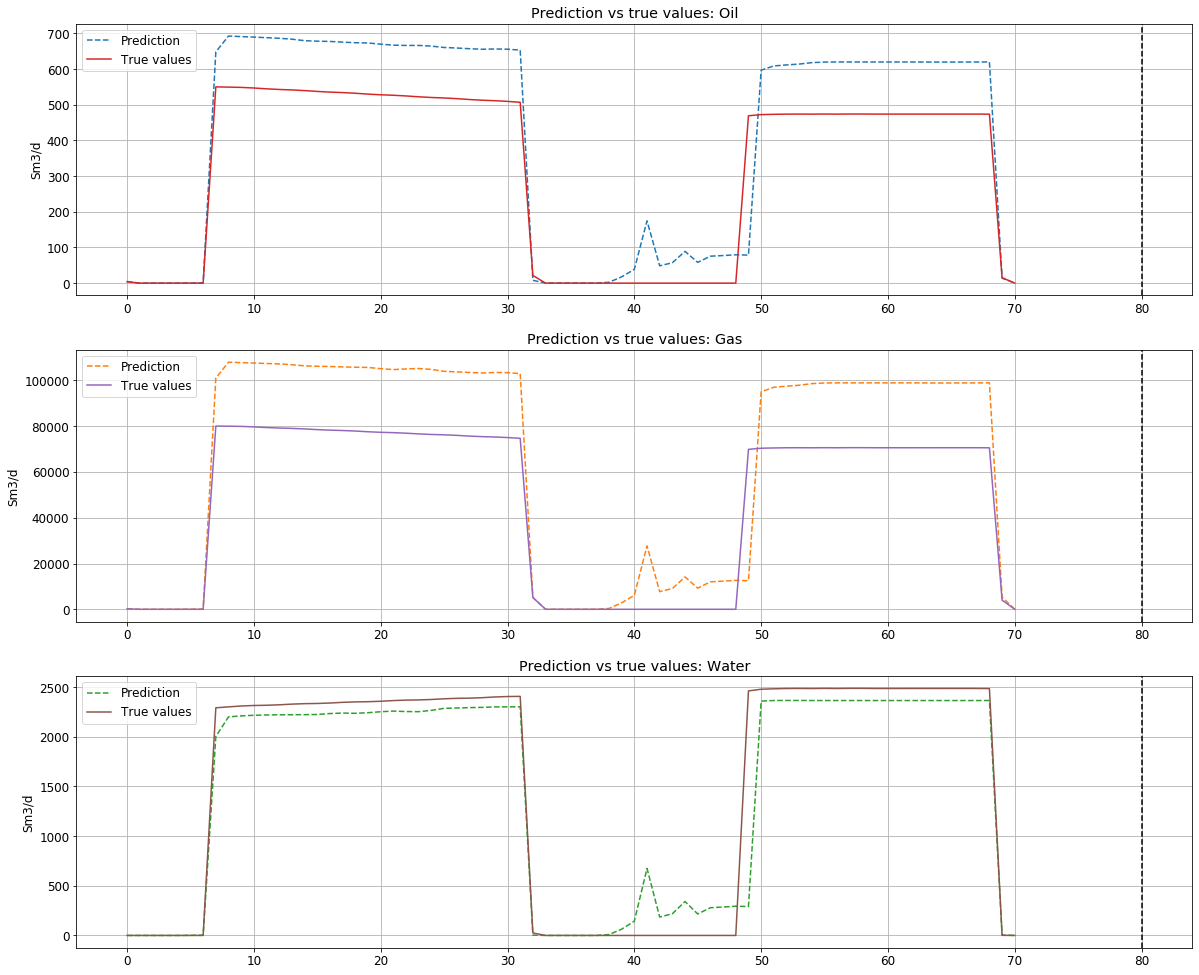

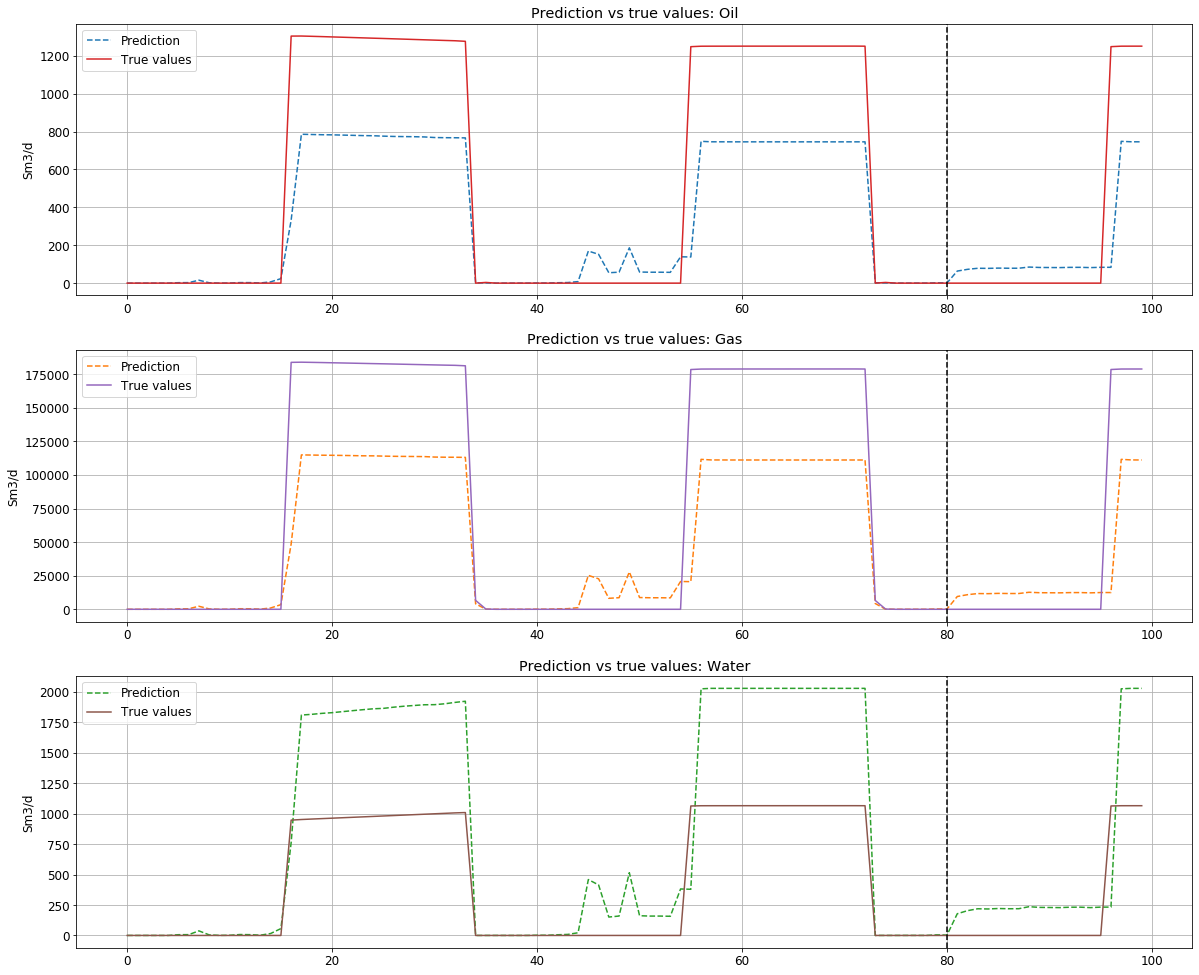

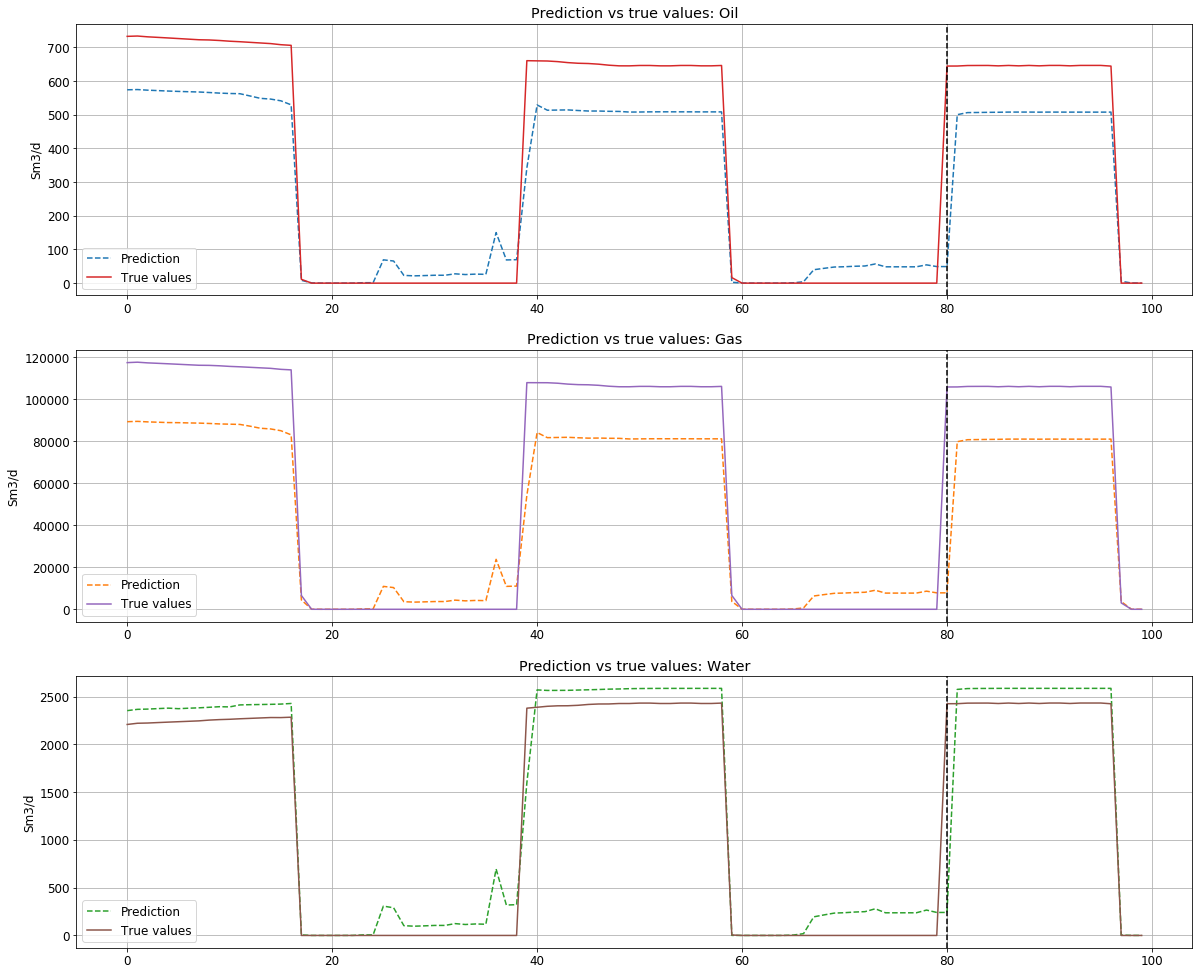

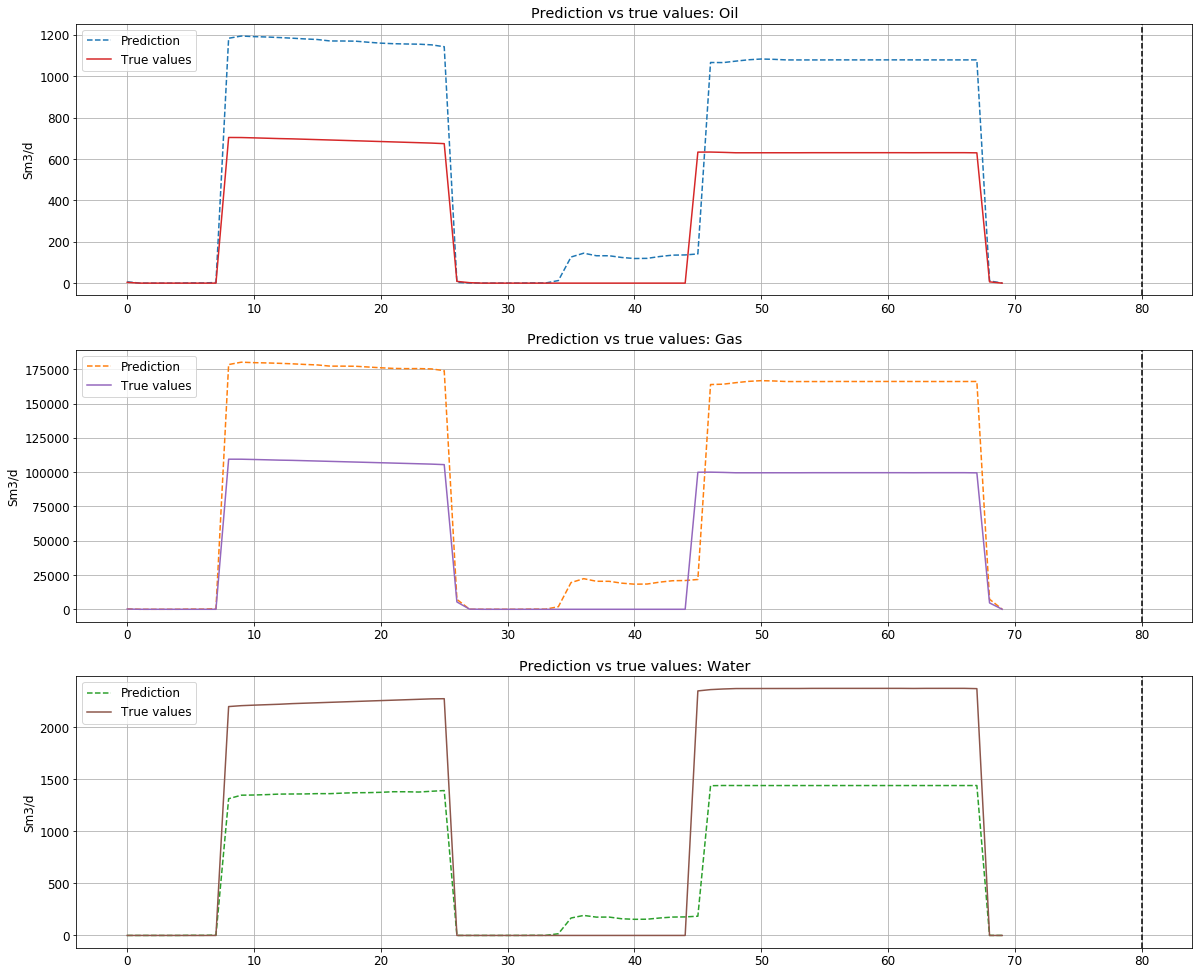

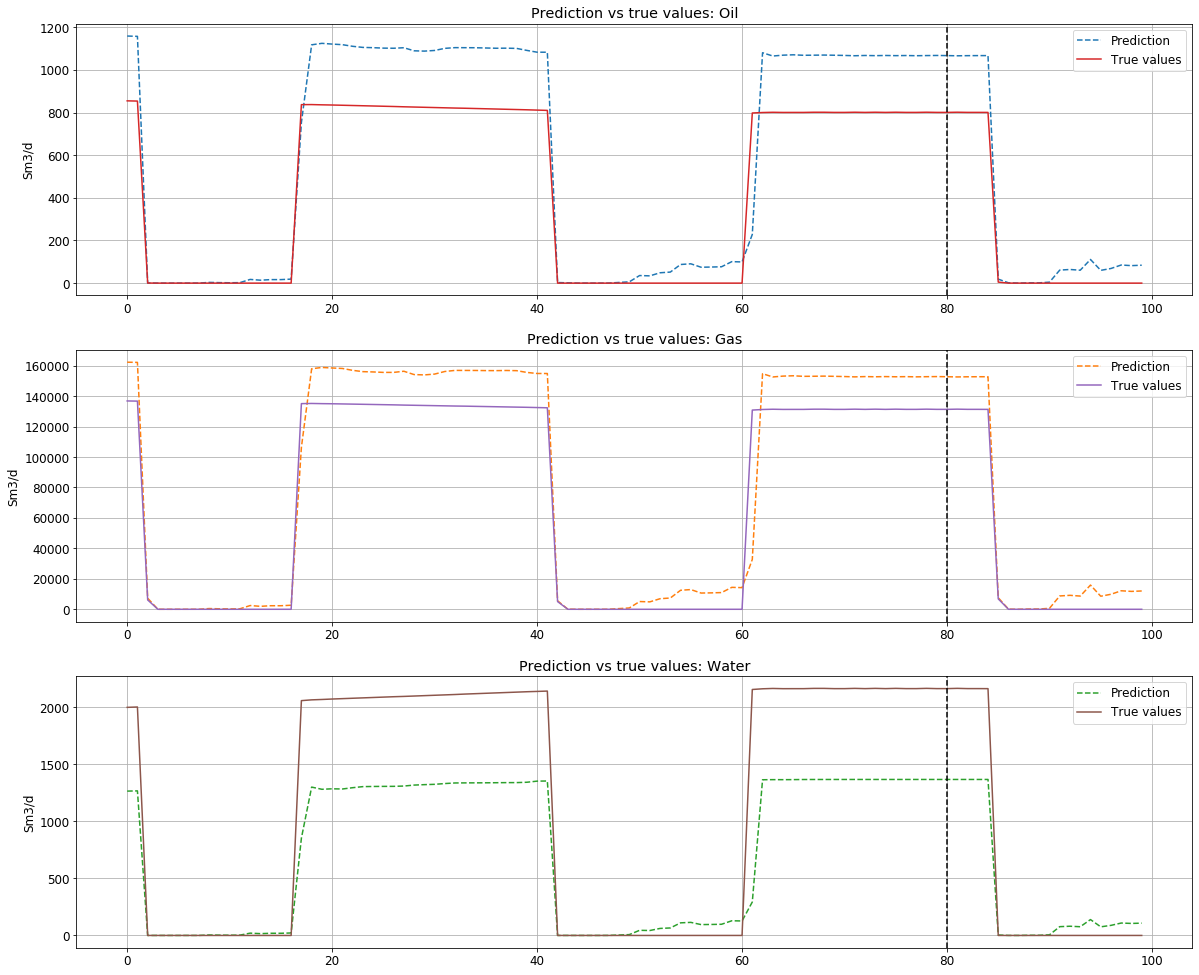

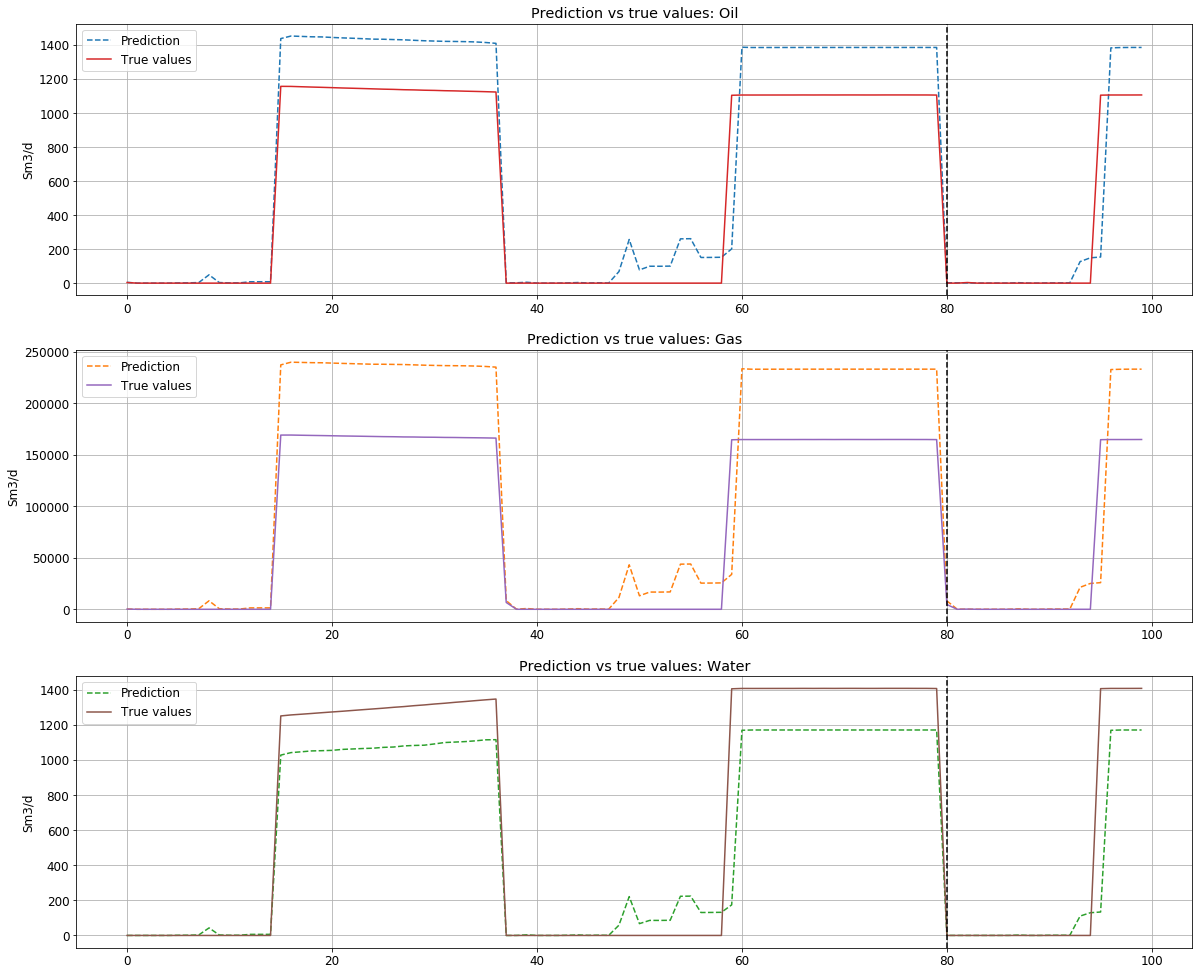

In [25]:
m = Gen(model_name='RF-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae',
         n_neurons=100,
         max_depth=2,
         reg_alpha=1)

m.train()
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()

In [ ]:
n_experiments = 50
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='RF-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE, 
       train_all_ratio=1/3)

    m.train(tuning=True, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))

## MLP

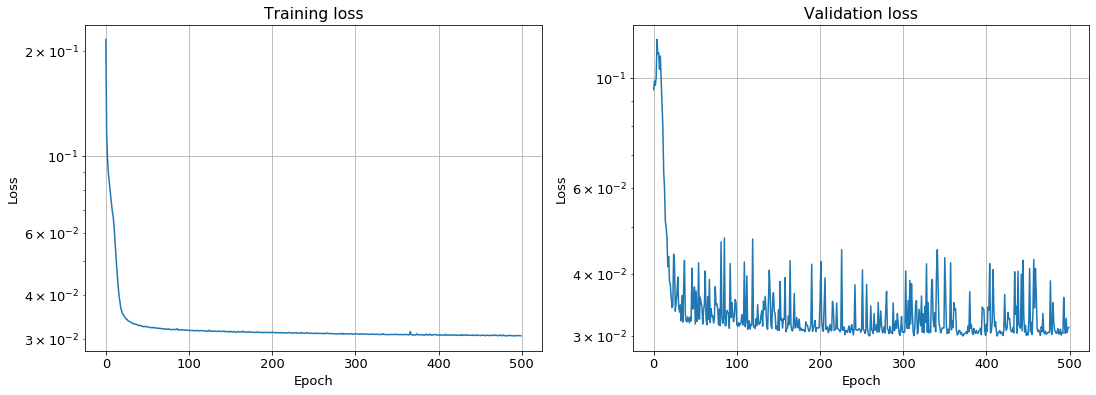

Train error:      16.191
Test error:       10.323
Training time:    1044.000 s



C:\Users\Asus\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/MLP-4.hdf saved


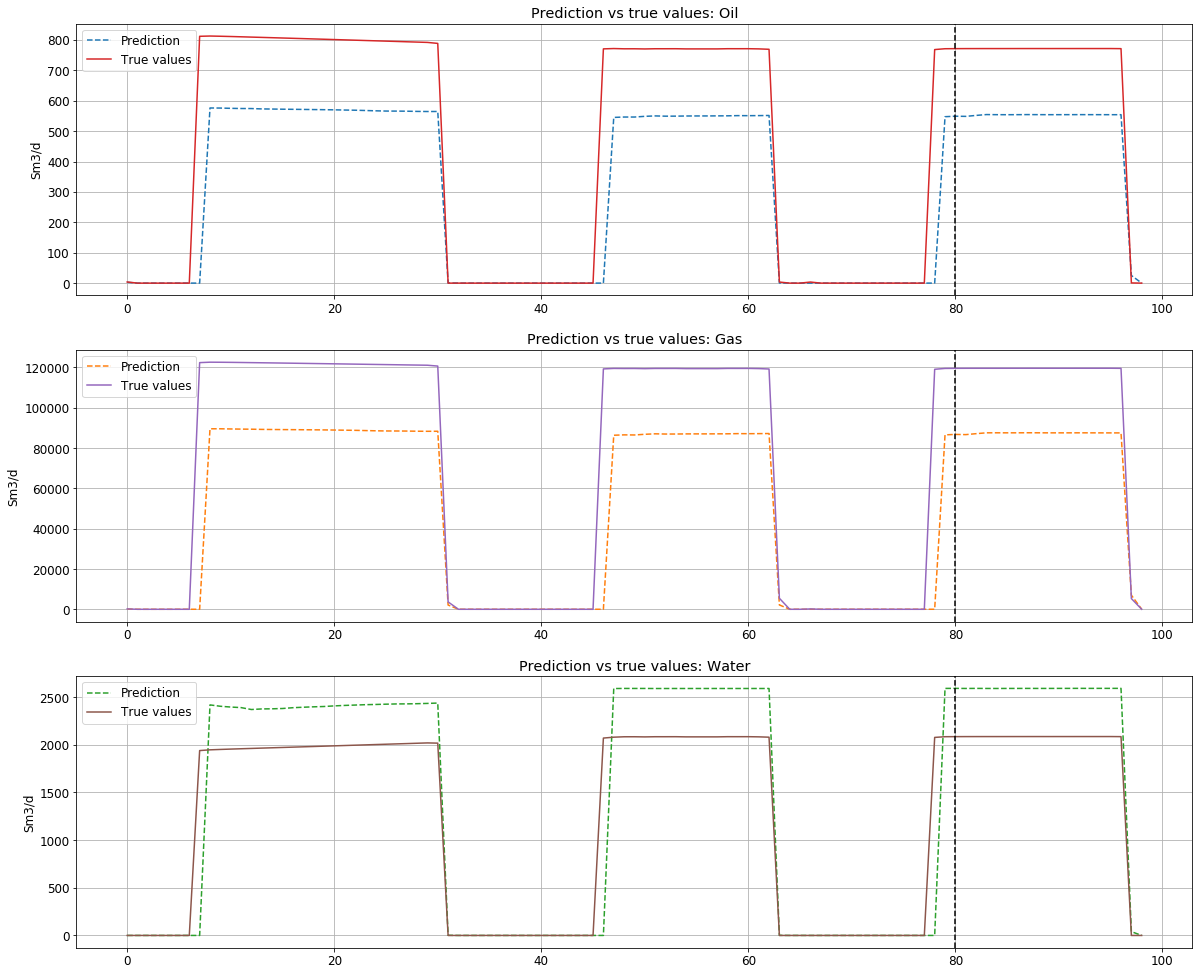

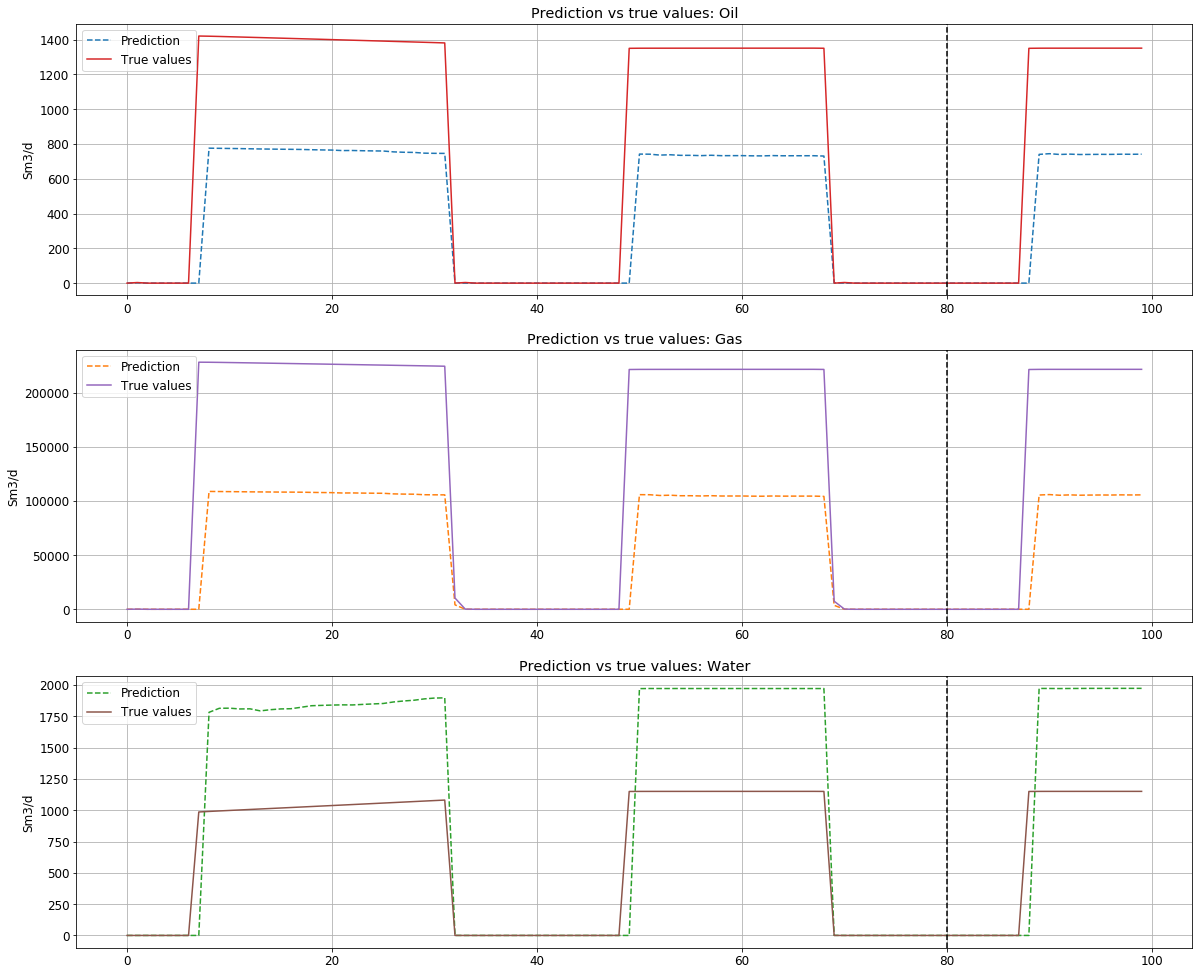

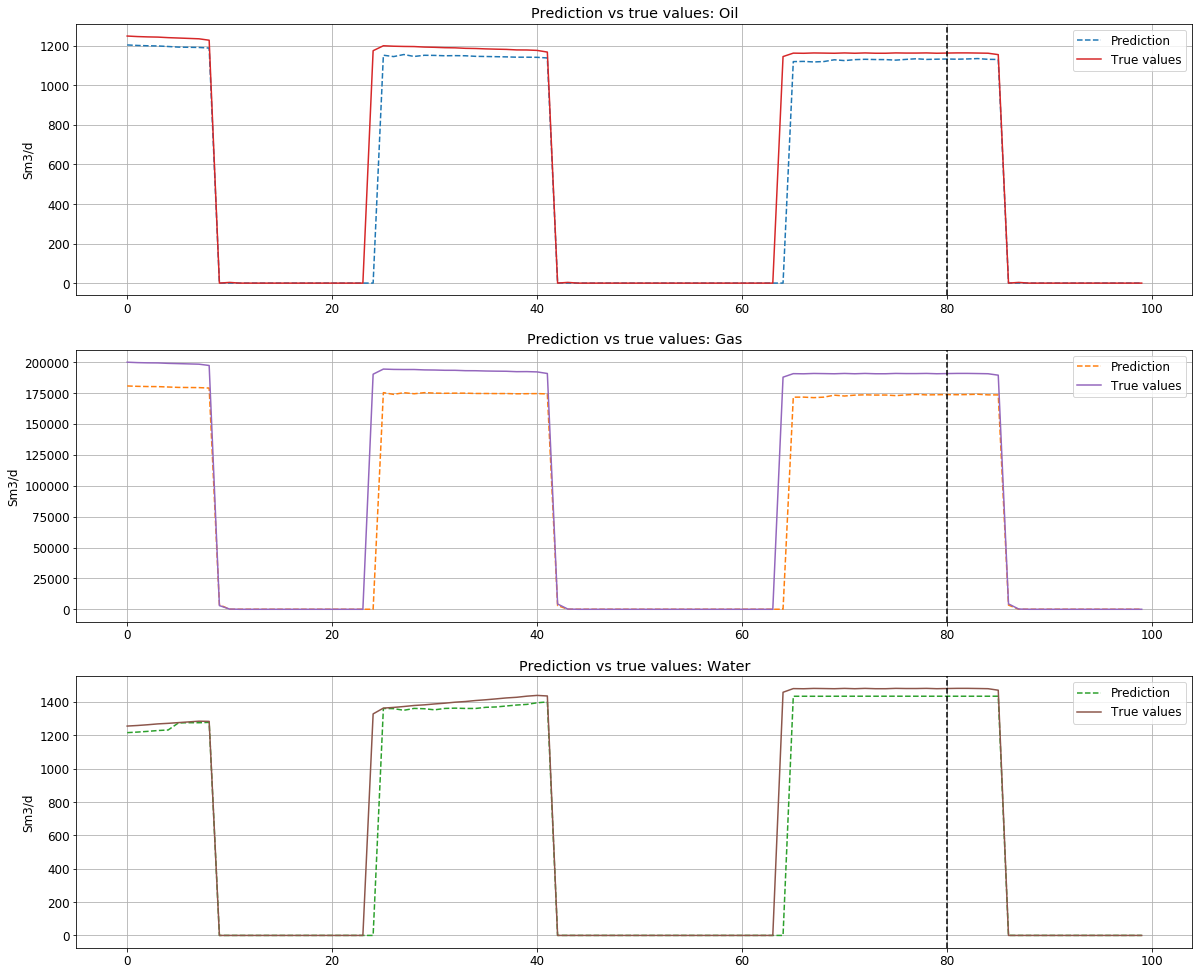

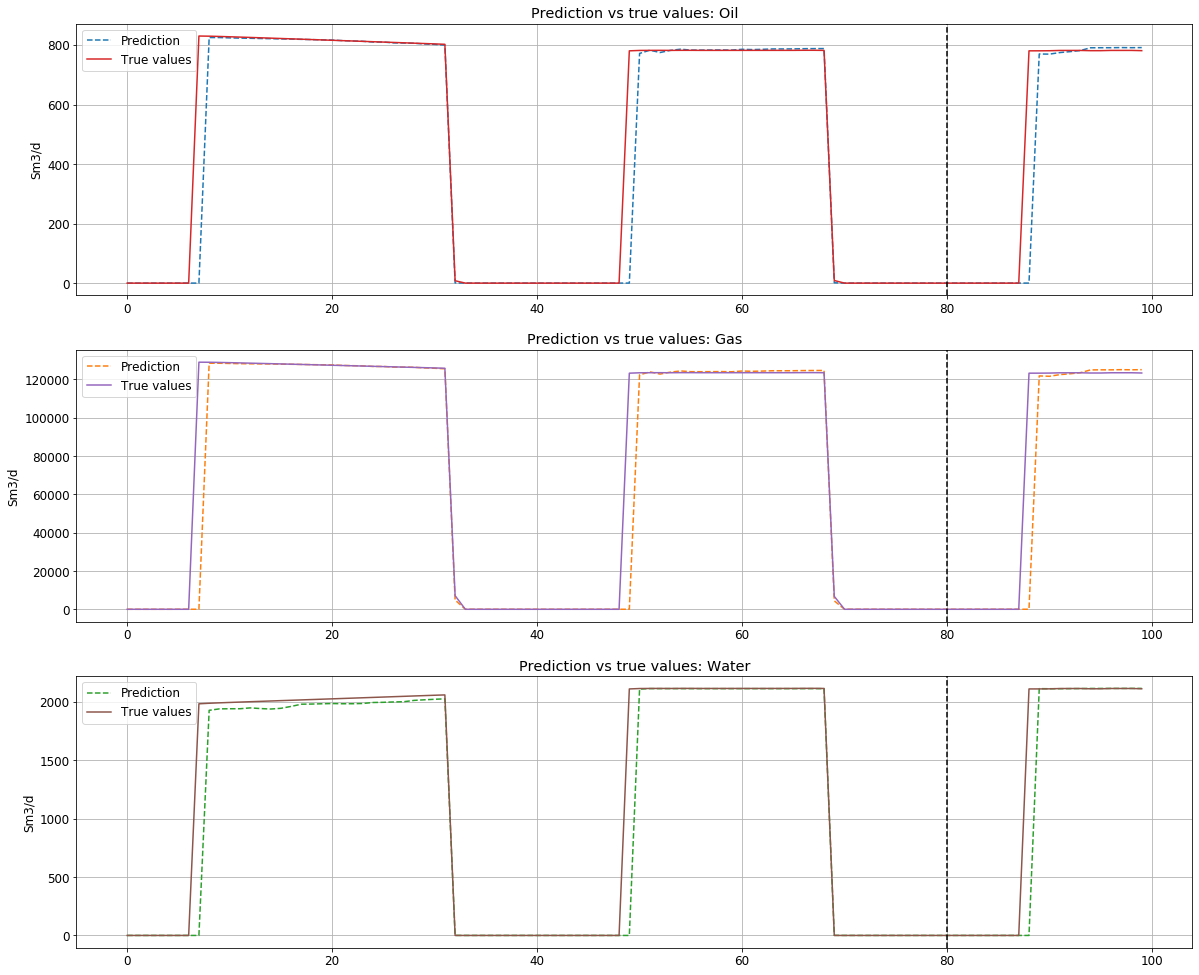

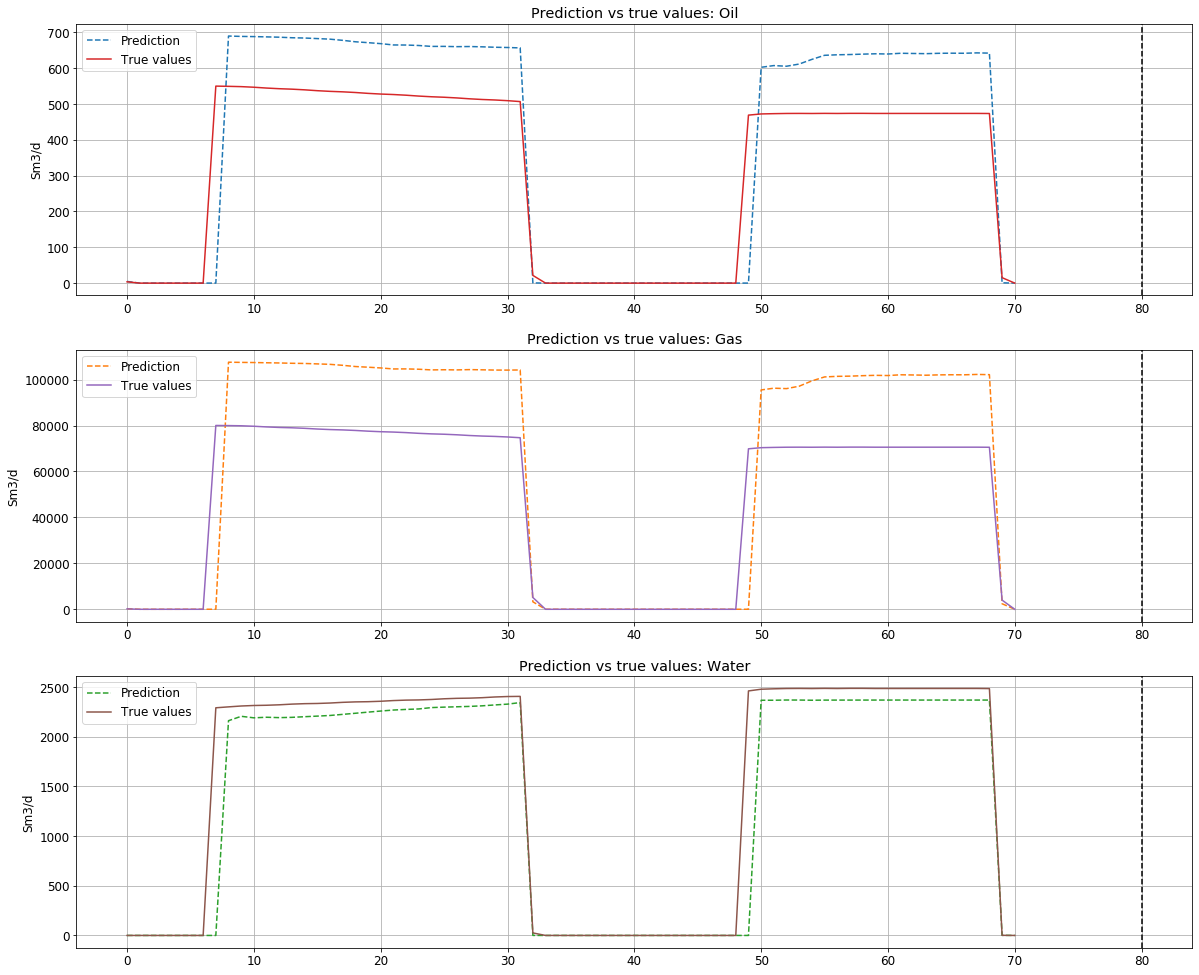

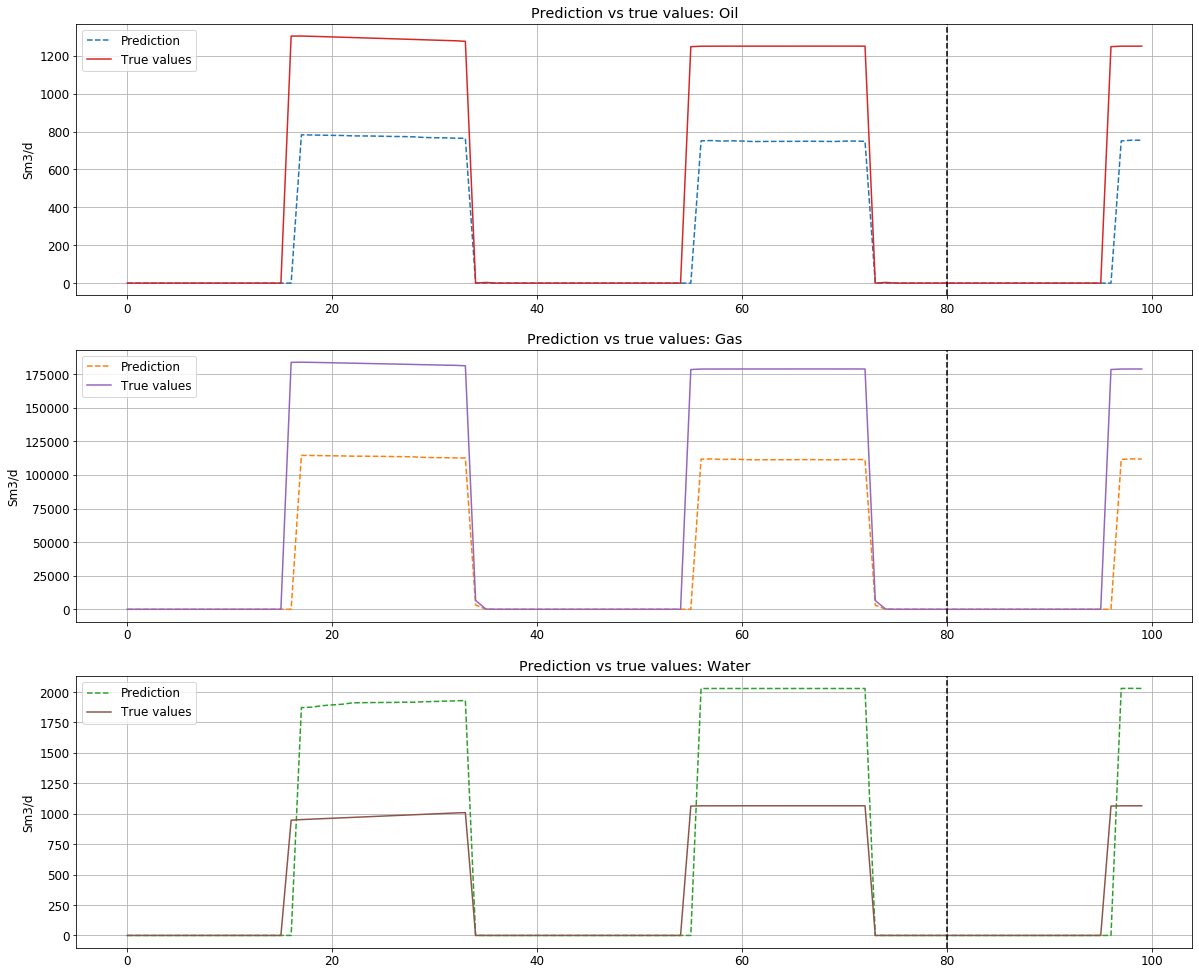

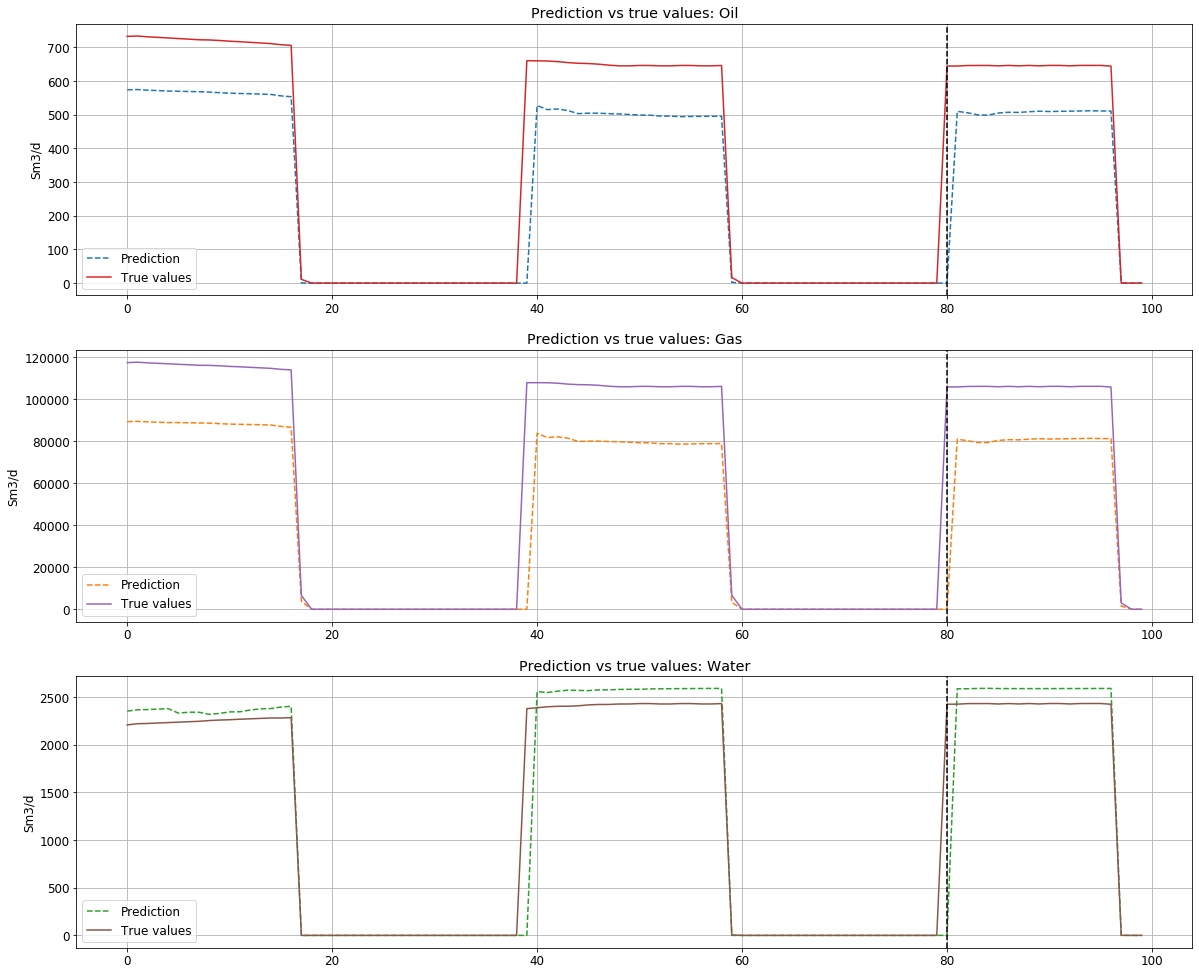

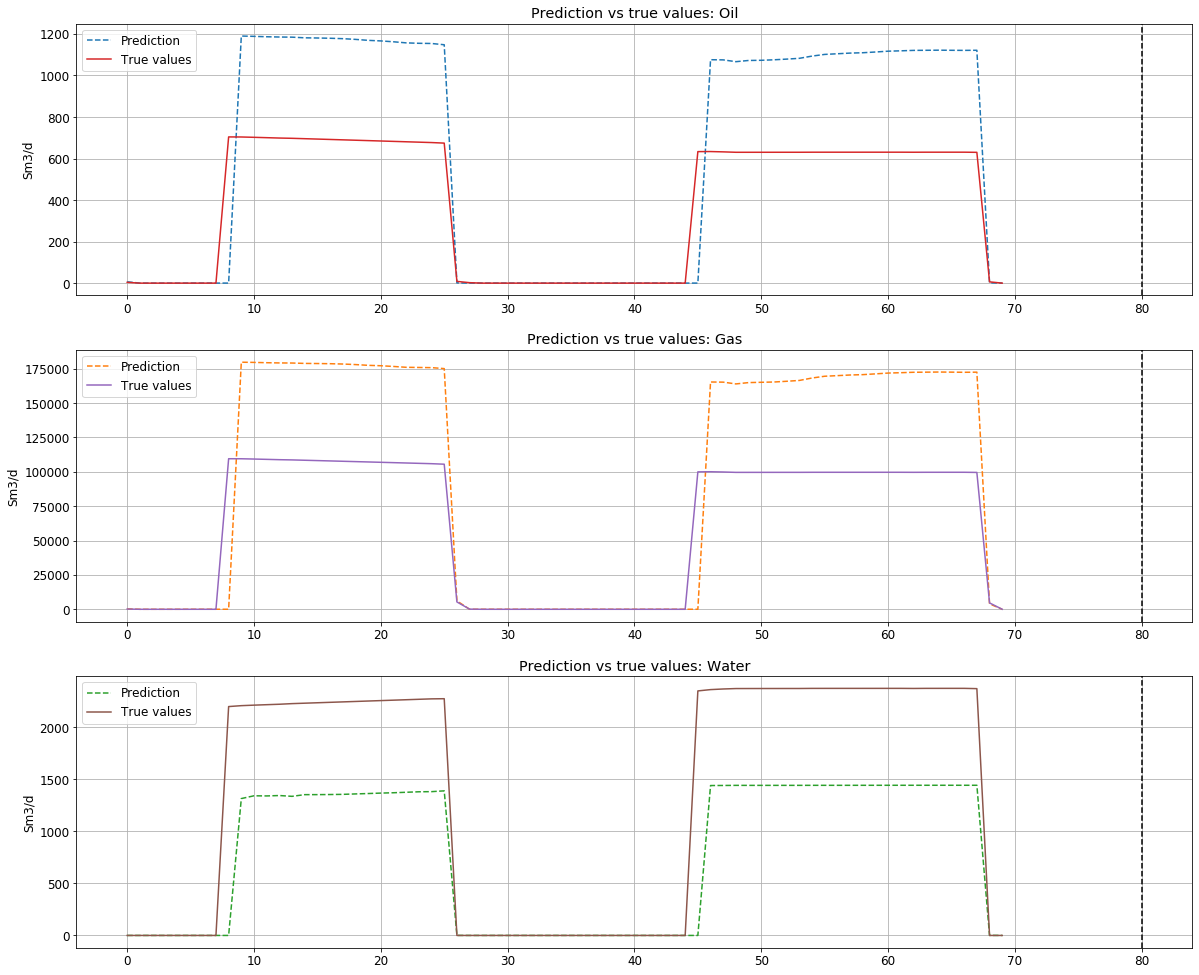

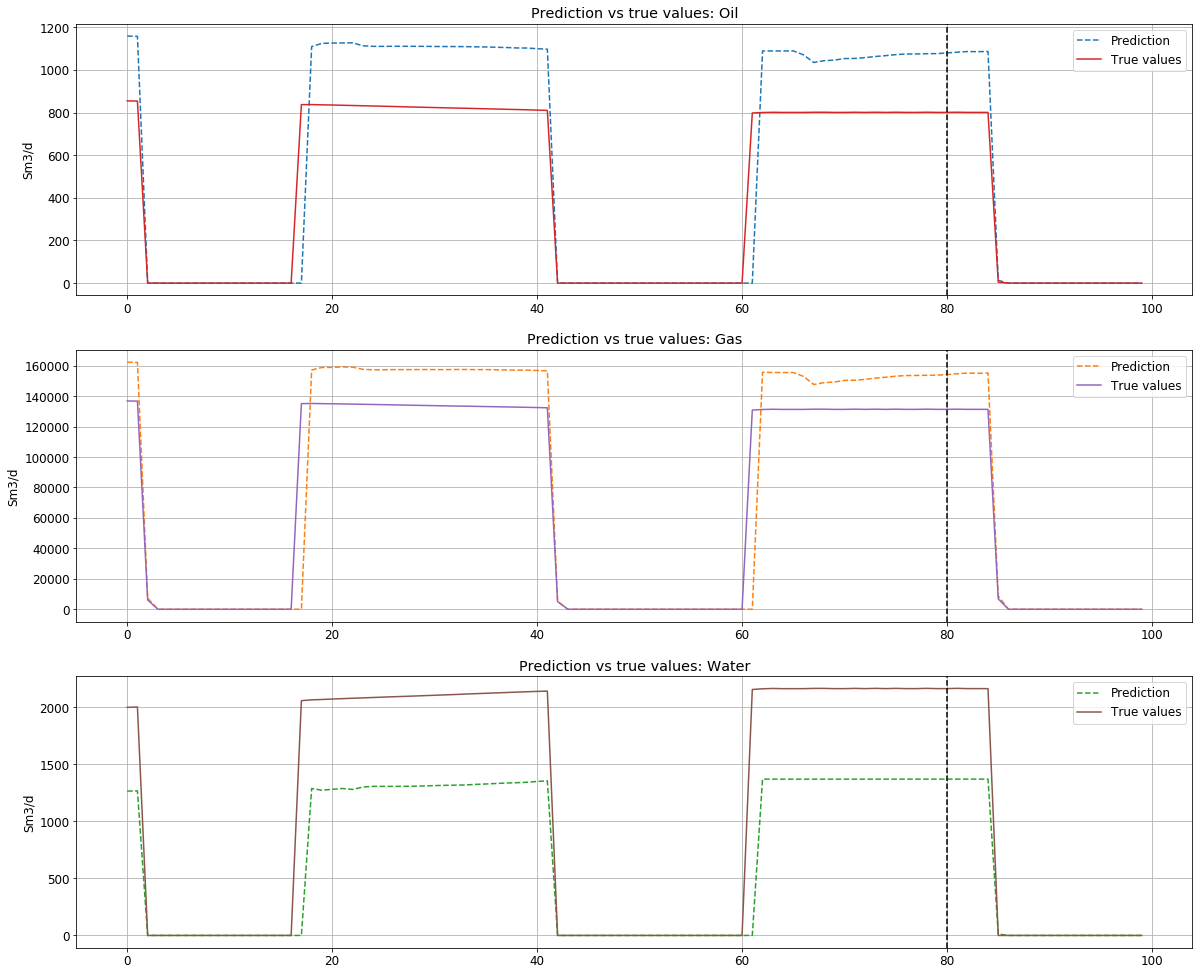

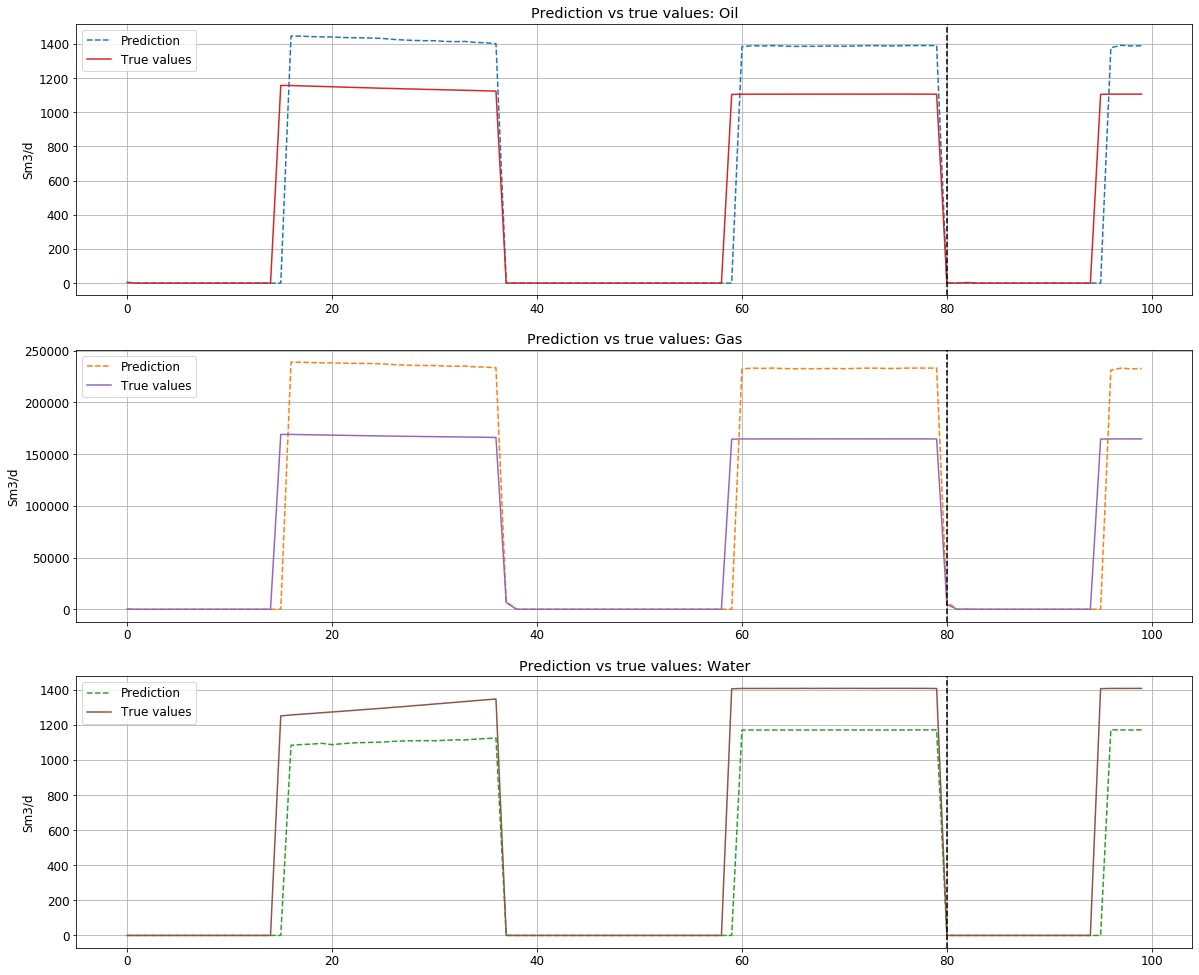

In [4]:
m = Gen(model_name='MLP-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae',
         lr=1e-4,
         n_layers=3, 
         n_neurons=100,
         dropout=0.2)

m.train(n_epochs=500, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.save()

## TCN

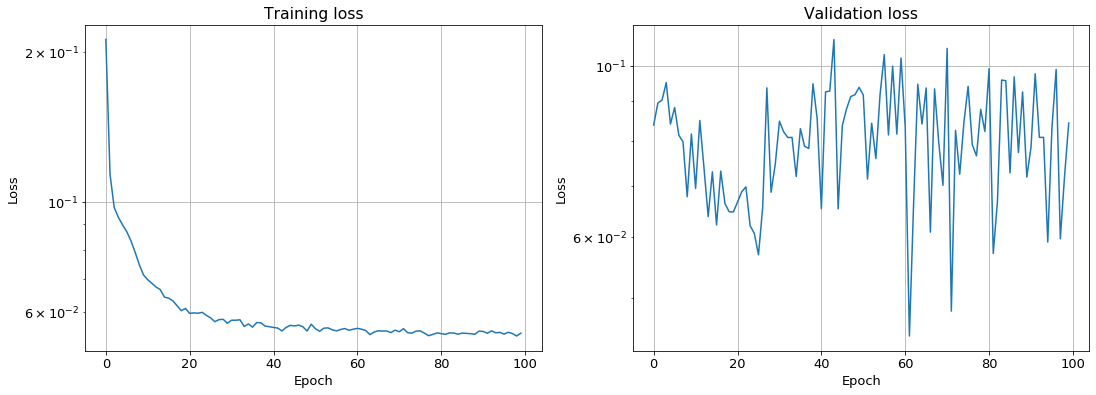

Train error:      11.166
Test error:       9.455
Training time:    472.000 s

C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-4.hdf saved


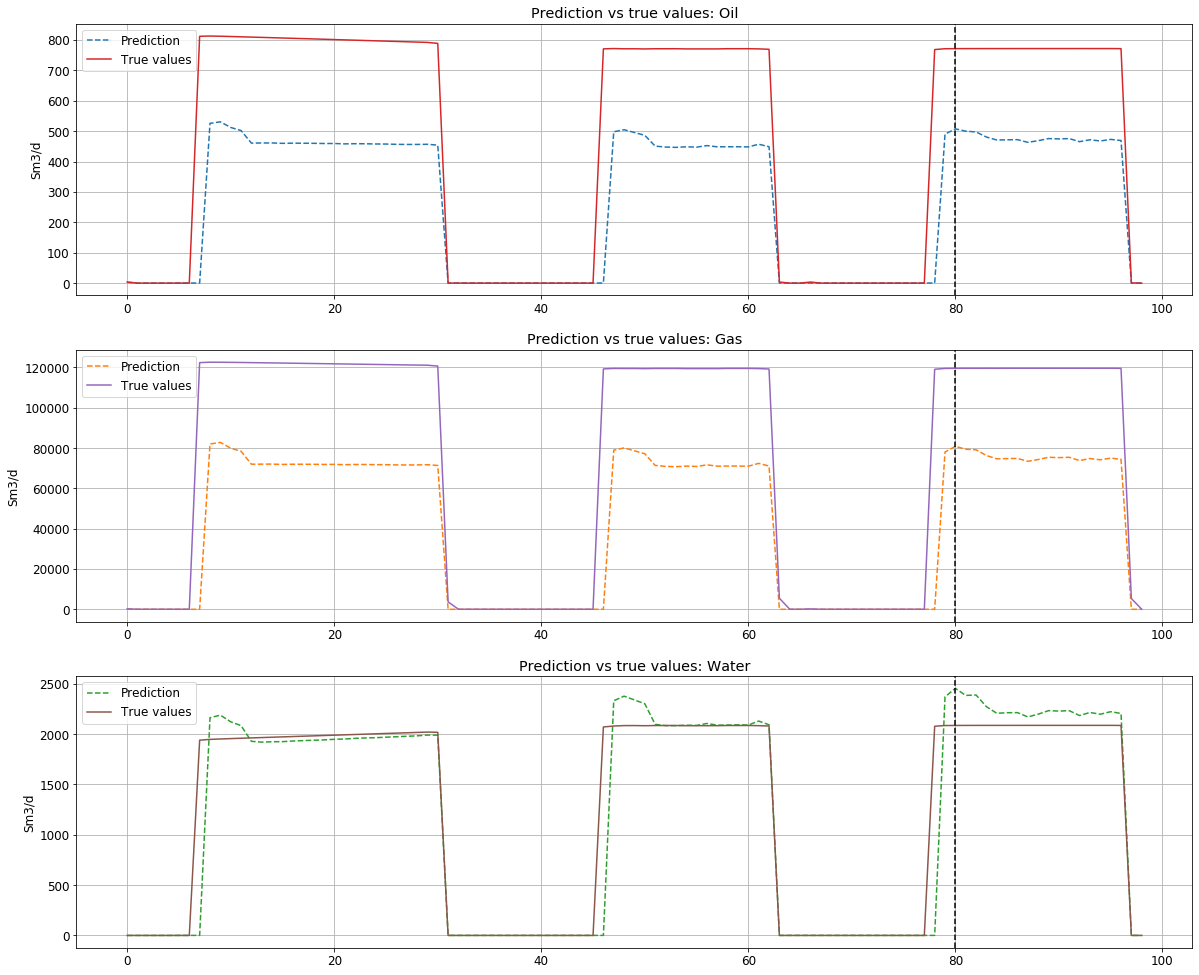

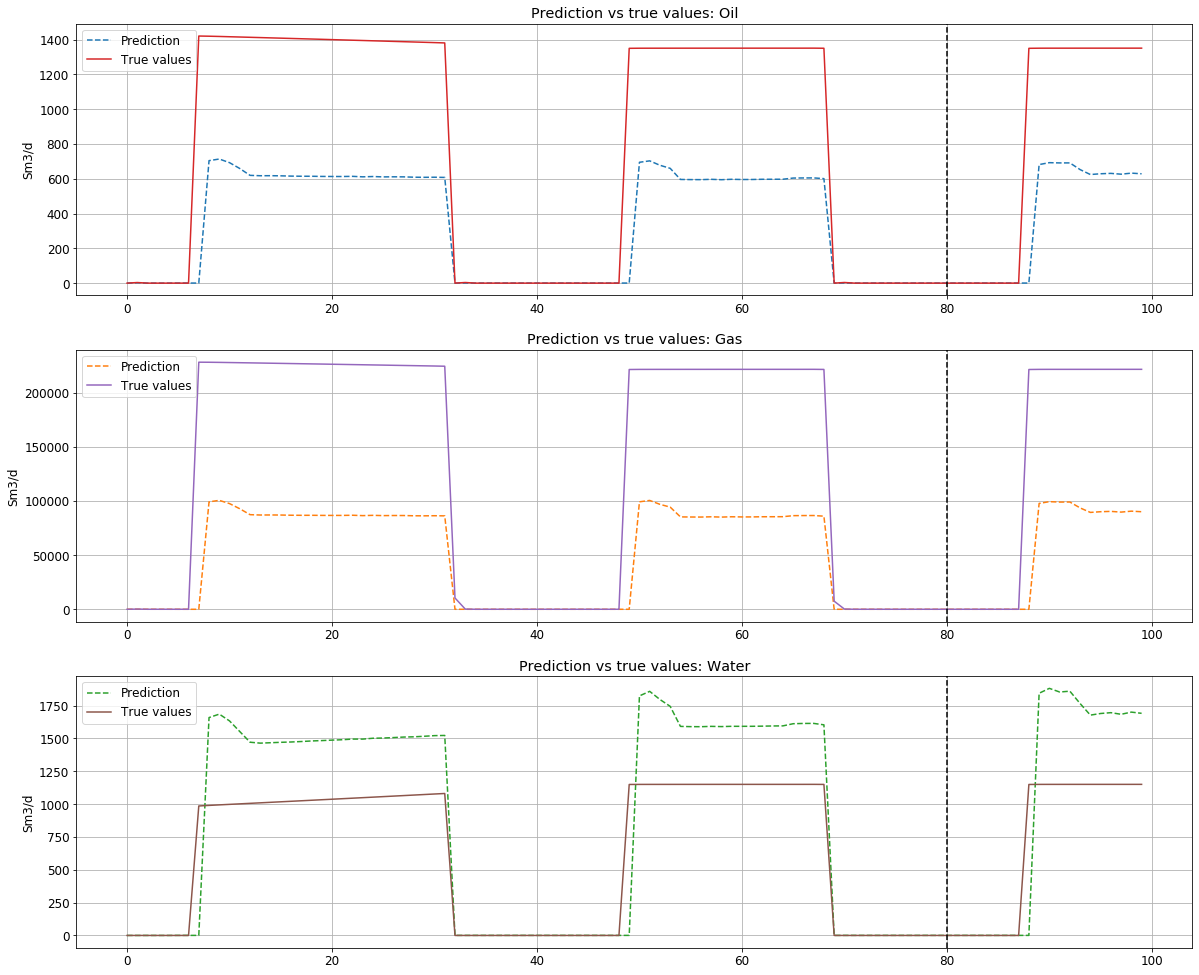

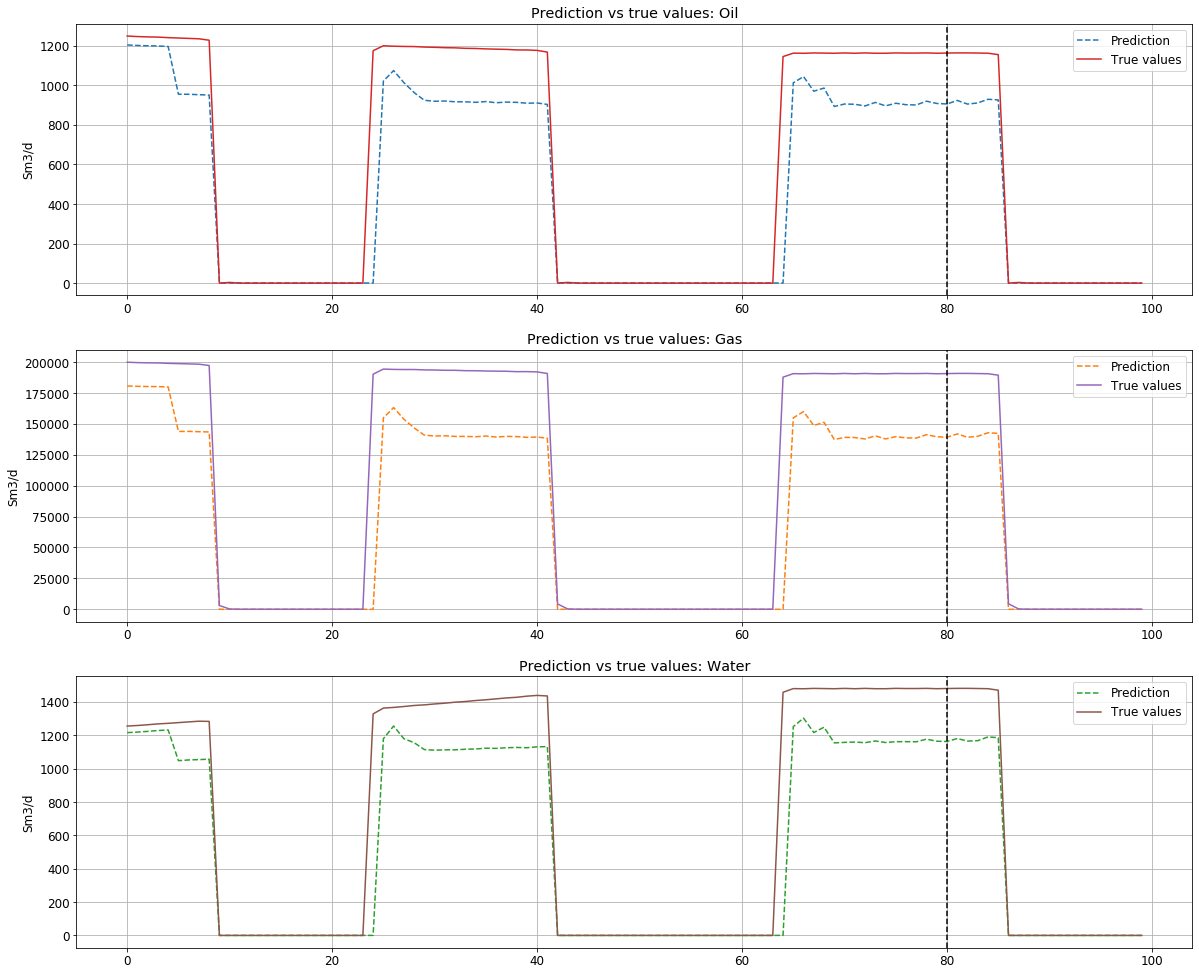

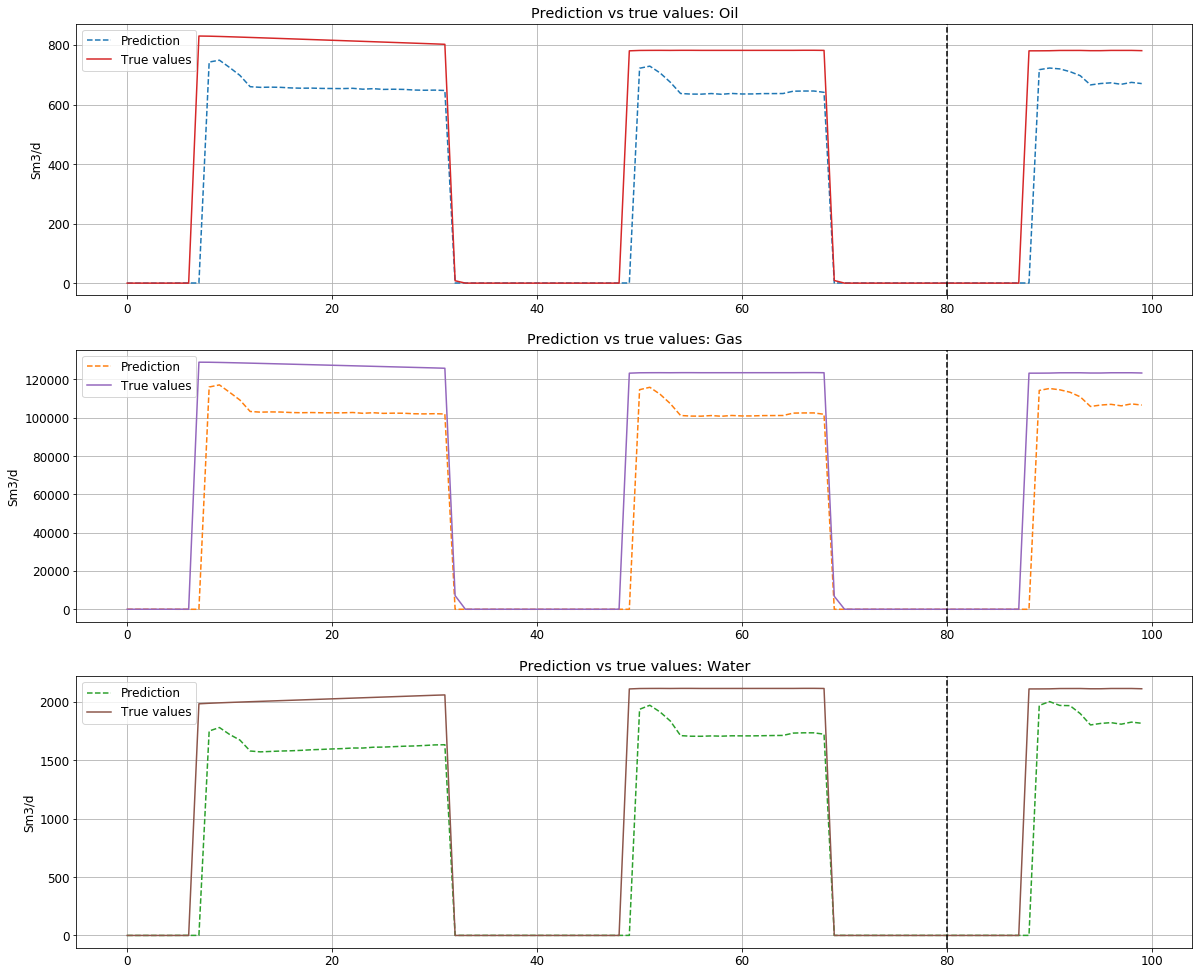

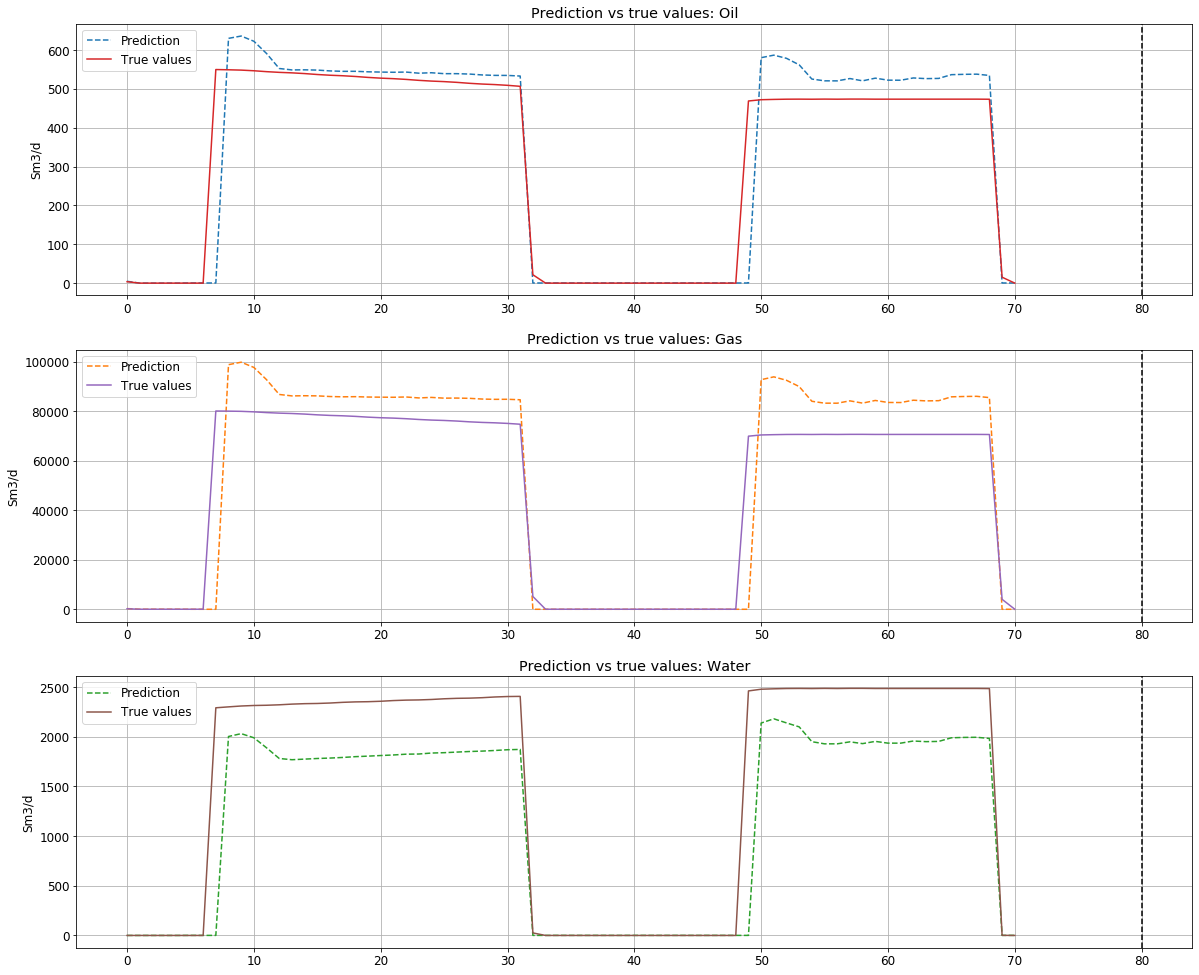

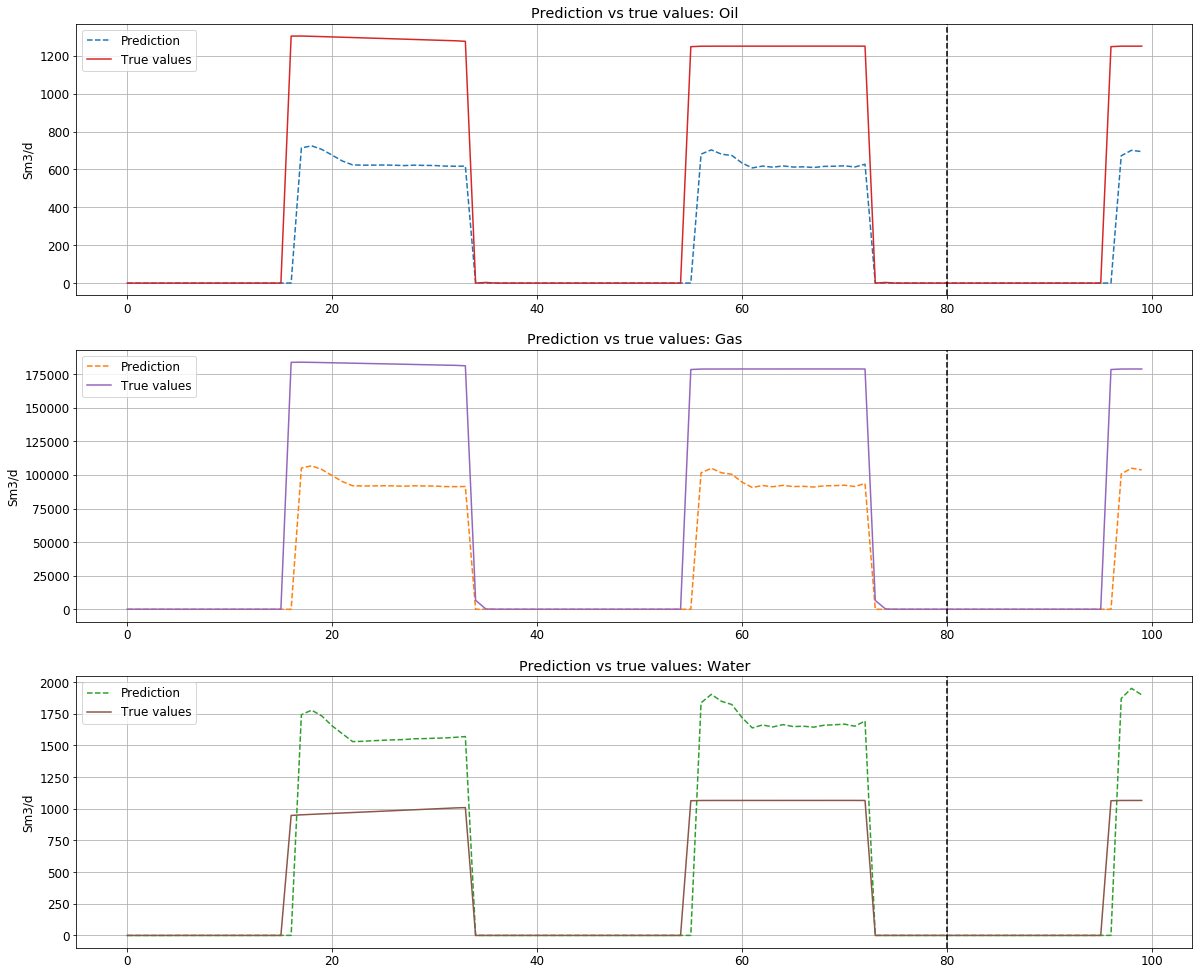

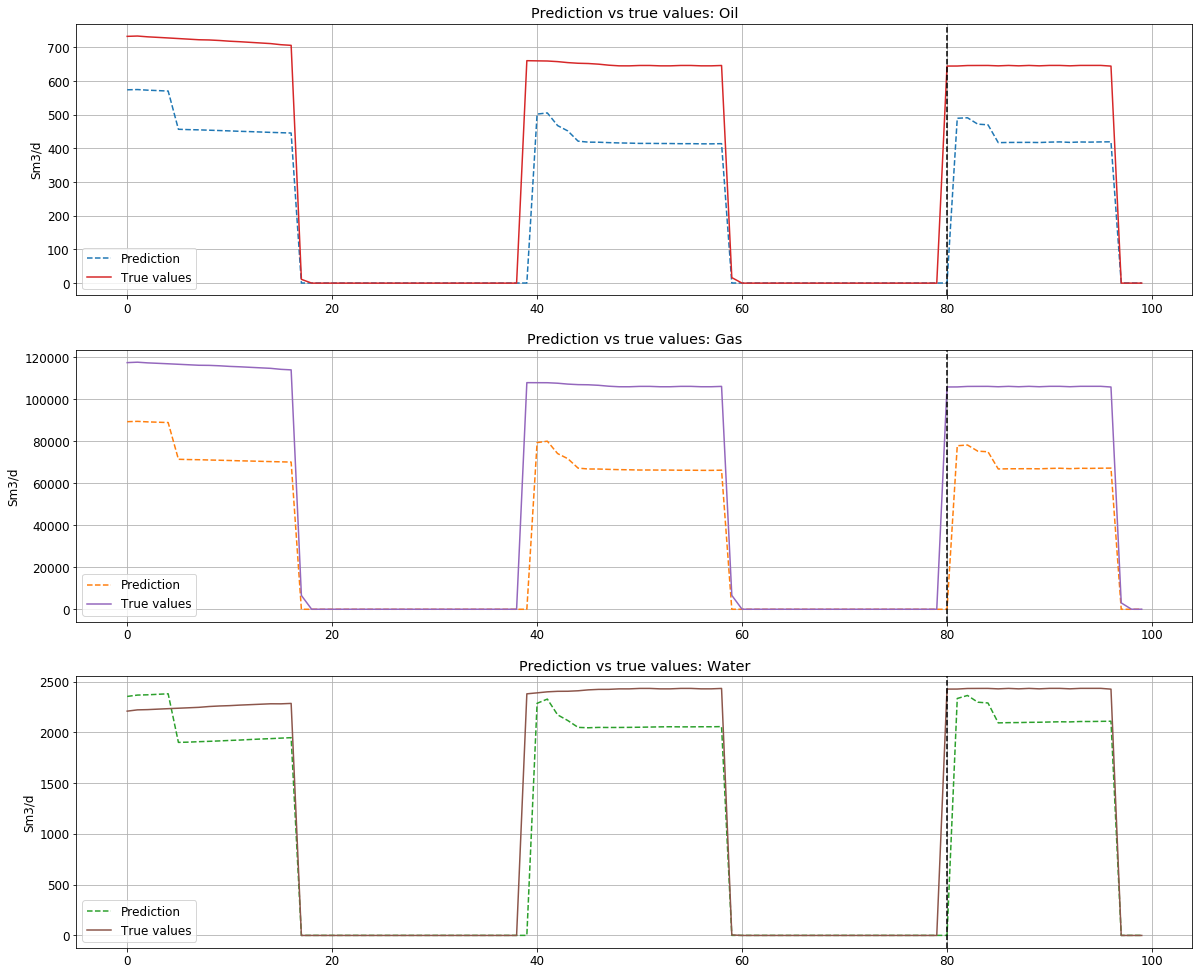

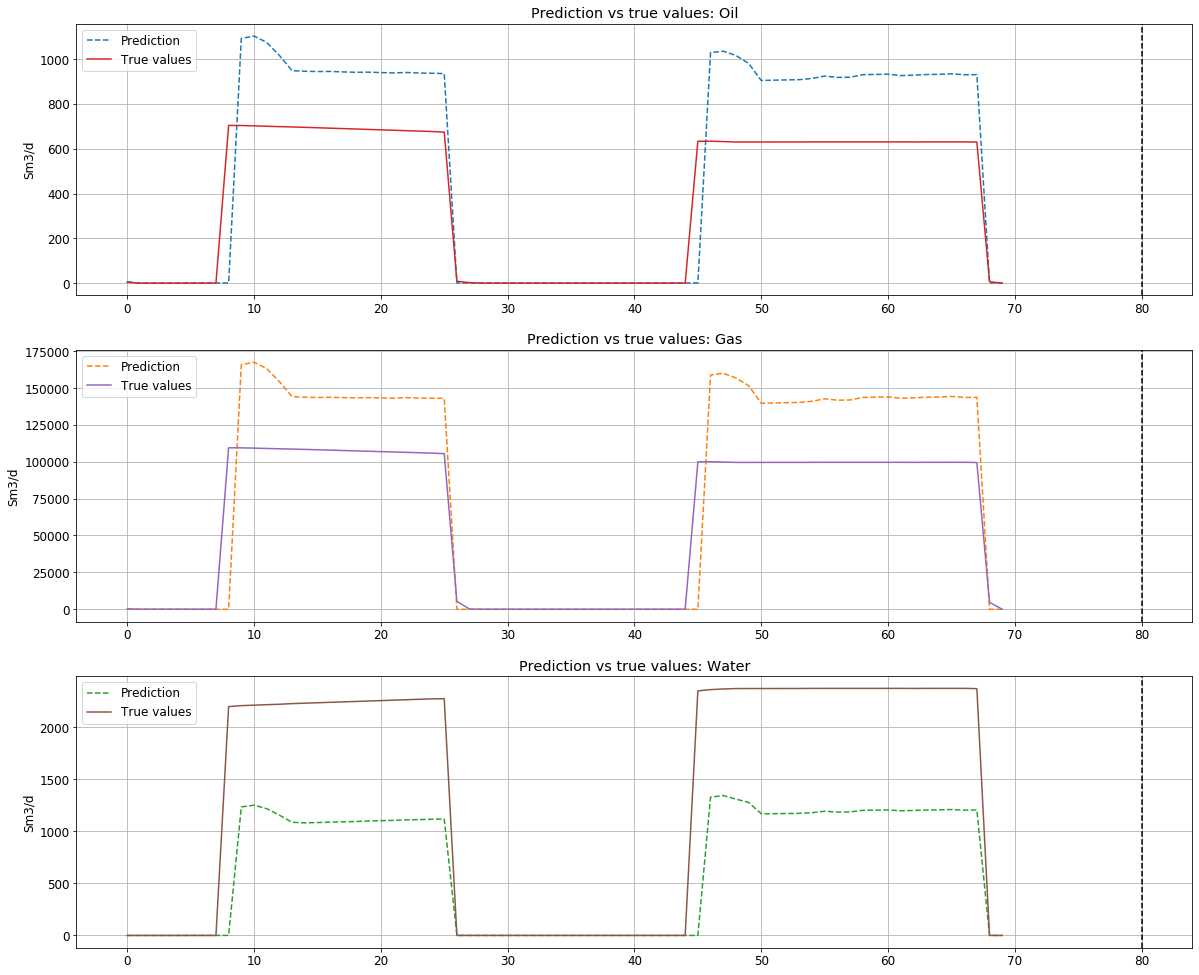

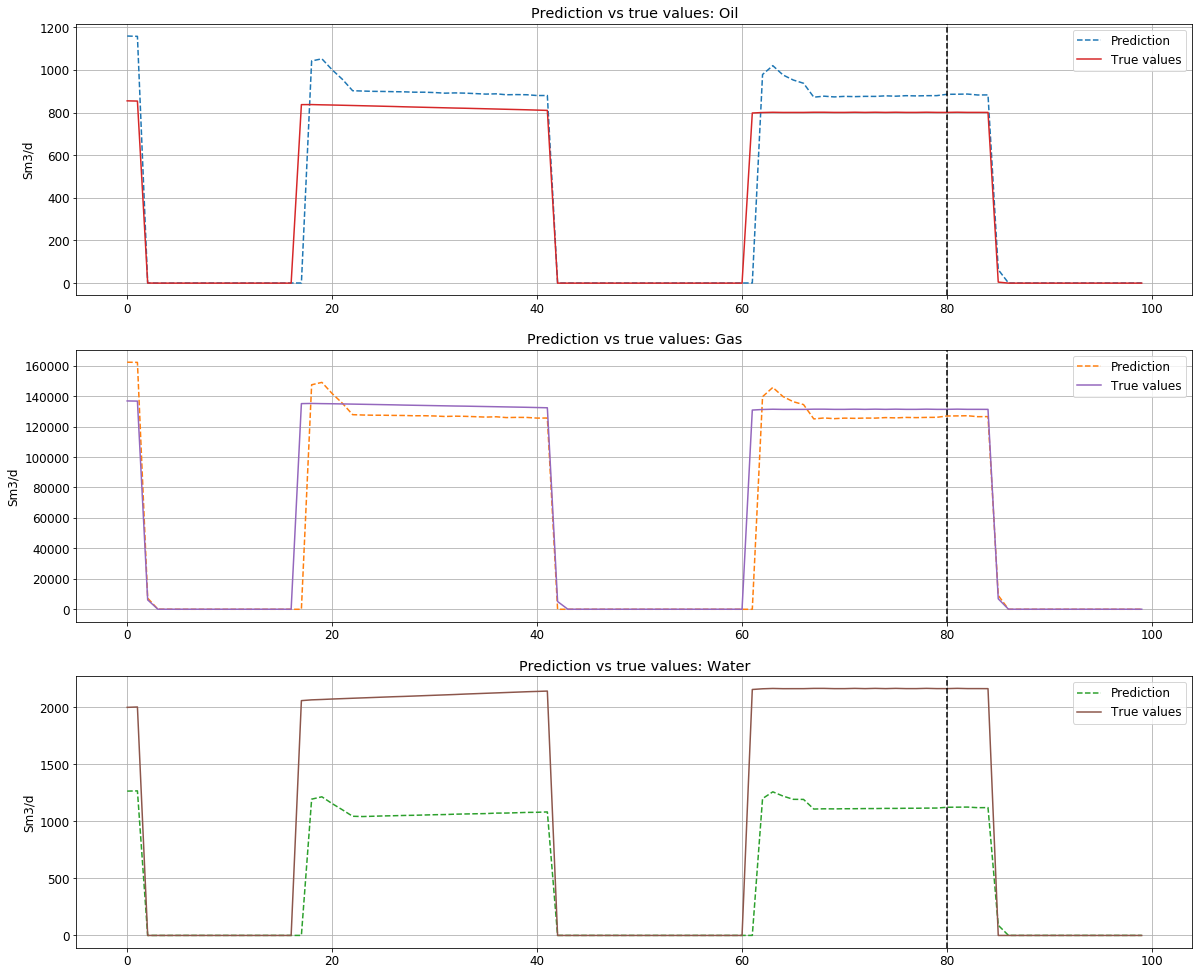

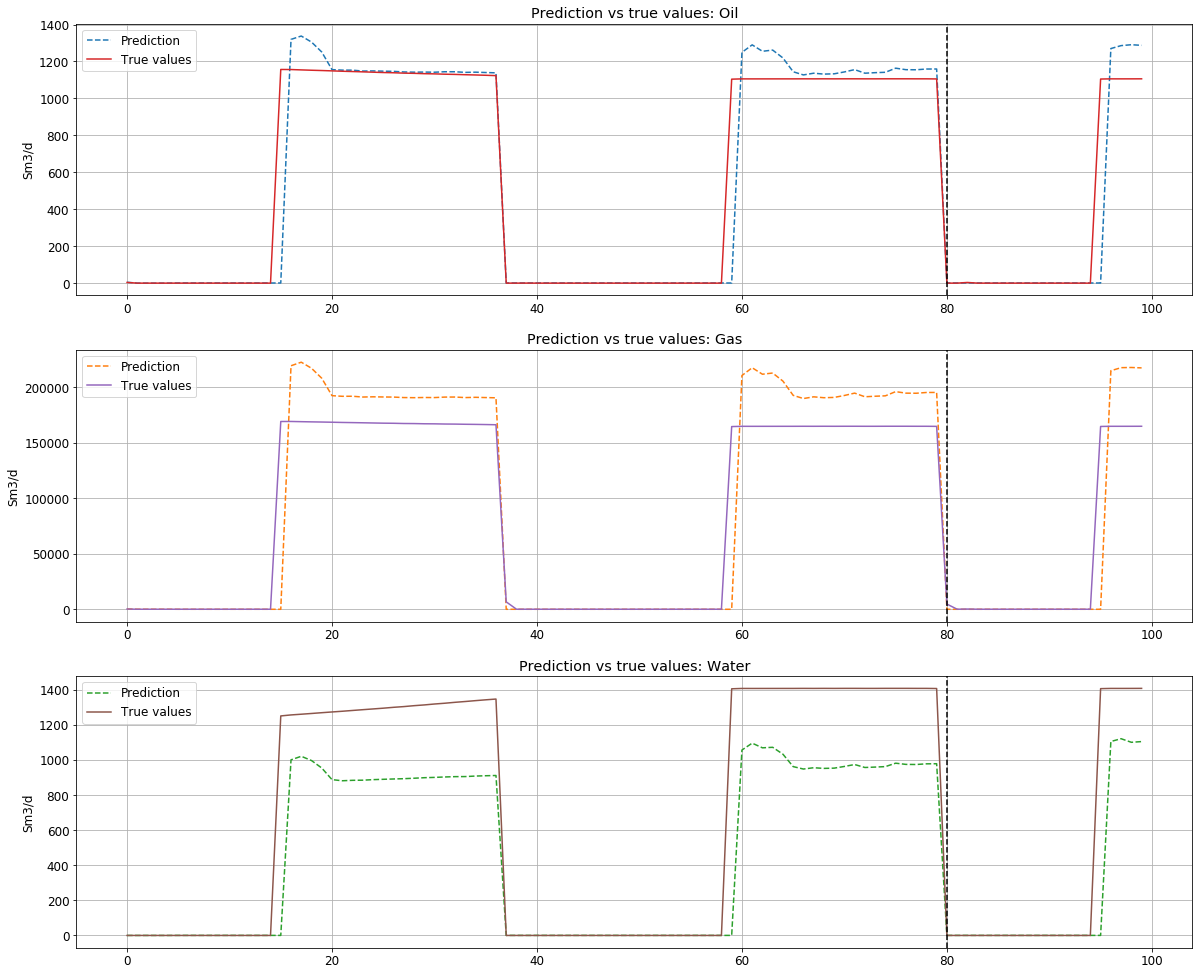

In [5]:
m = Gen(model_name='TCN-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae', 
         lr=1e-3)

m.train(n_epochs=100, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.save()

## LSTM

In [6]:
m = Gen(model_name='LSTM-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=100,
         dropout=0.2)

m.train(n_epochs=100, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.save()

C:\Users\Asus\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/LSTM-4.hdf saved


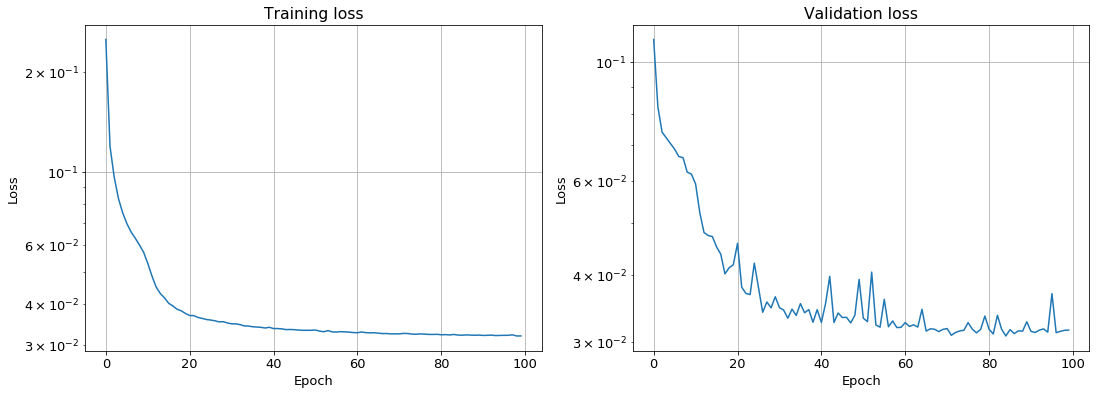

Train error:      16.293
Test error:       10.420
Training time:    2702.000 s



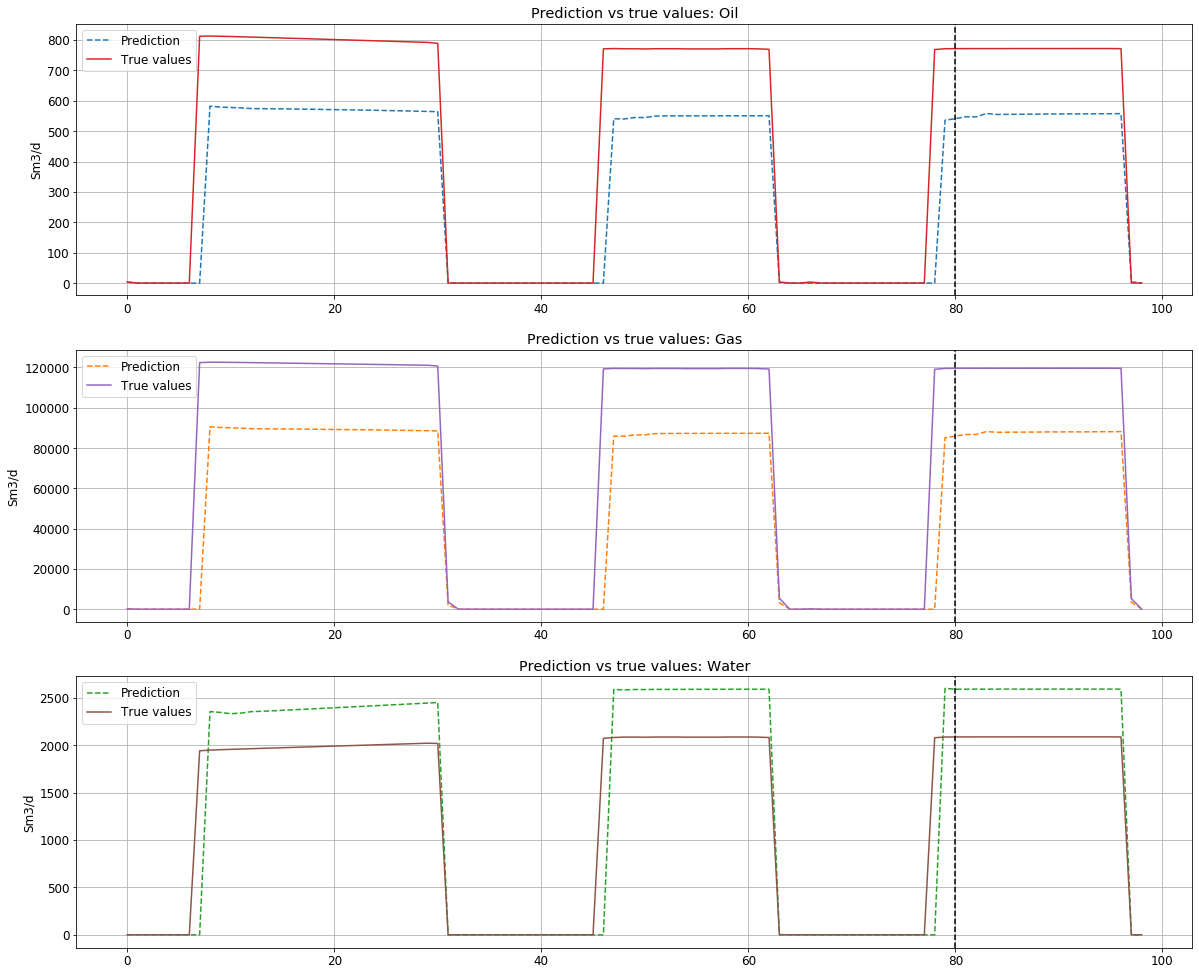

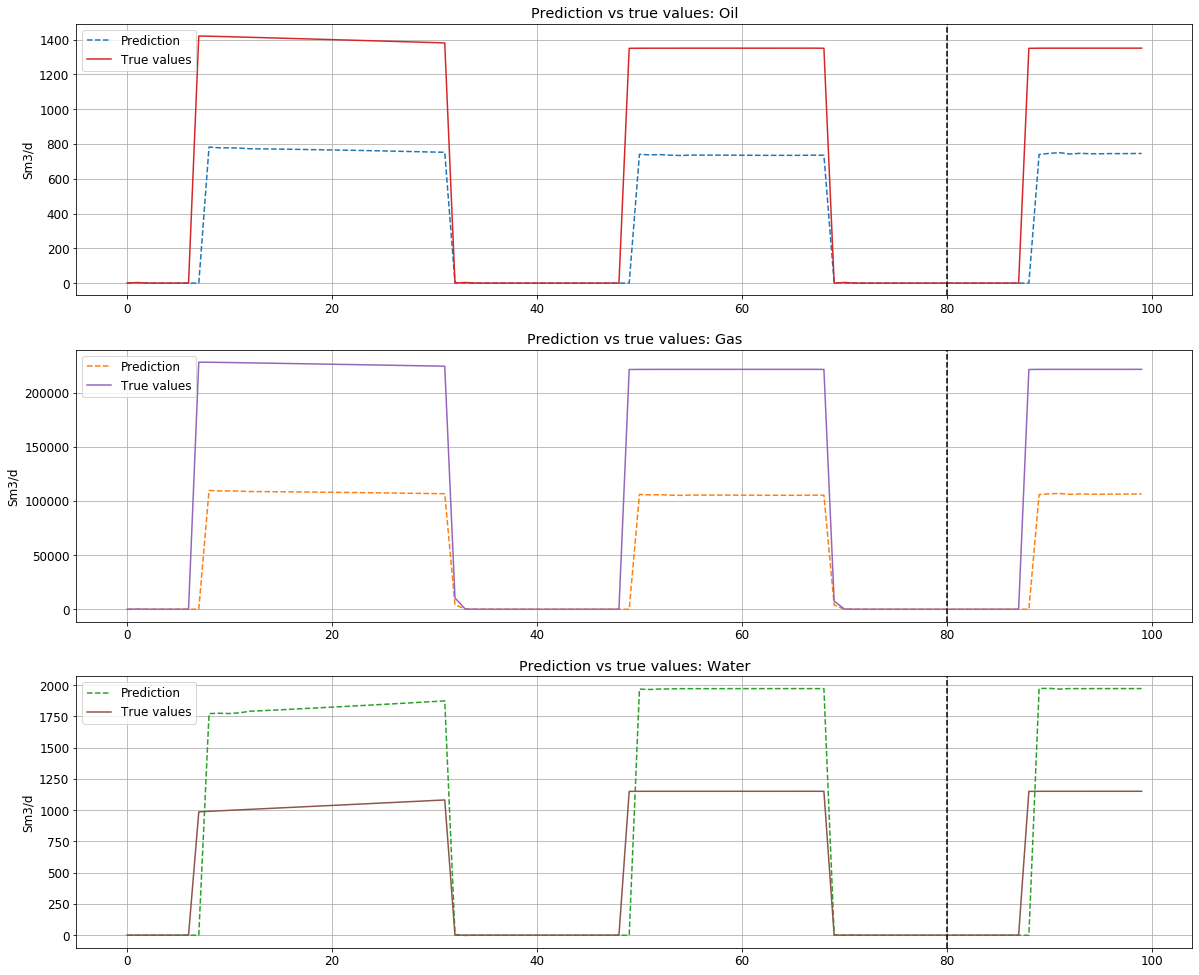

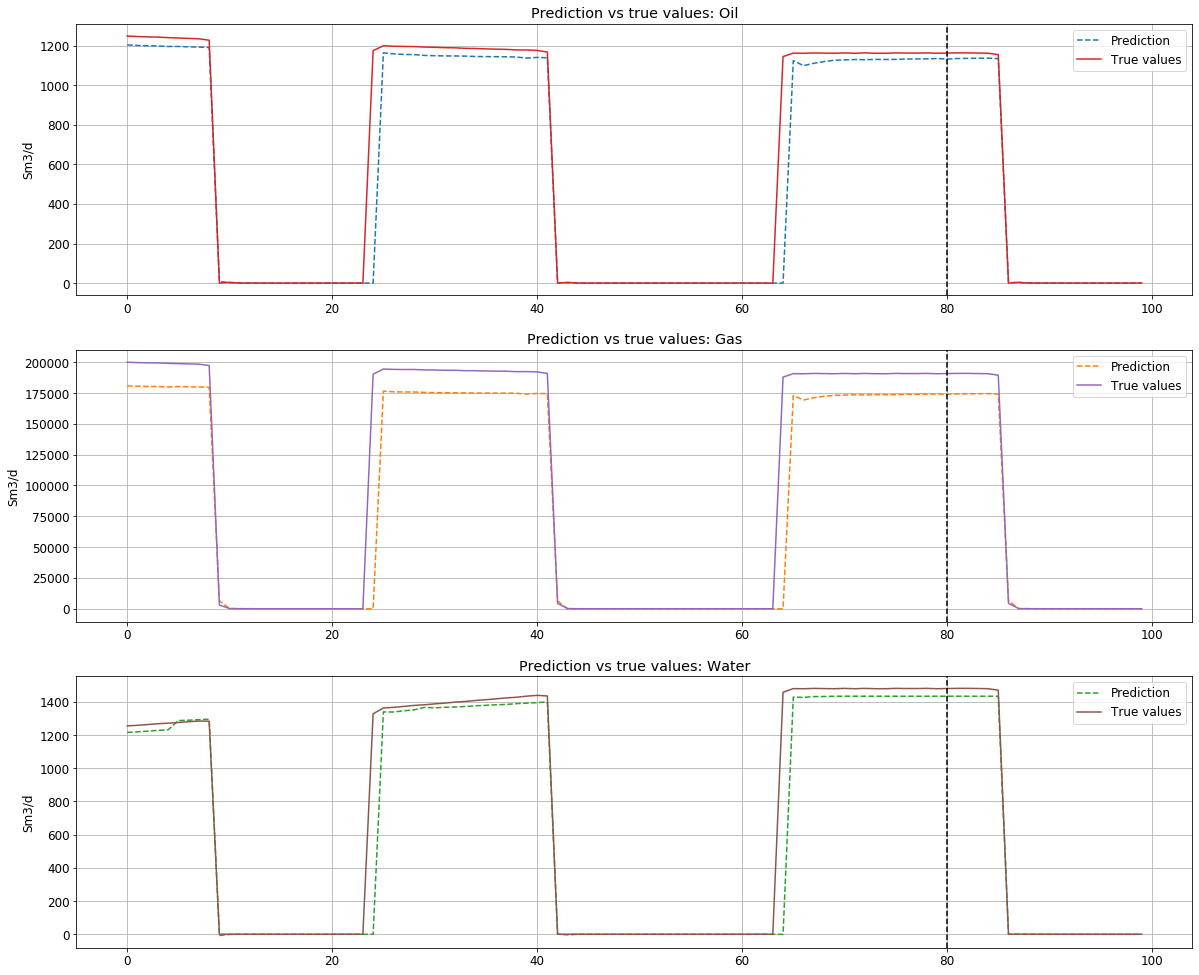

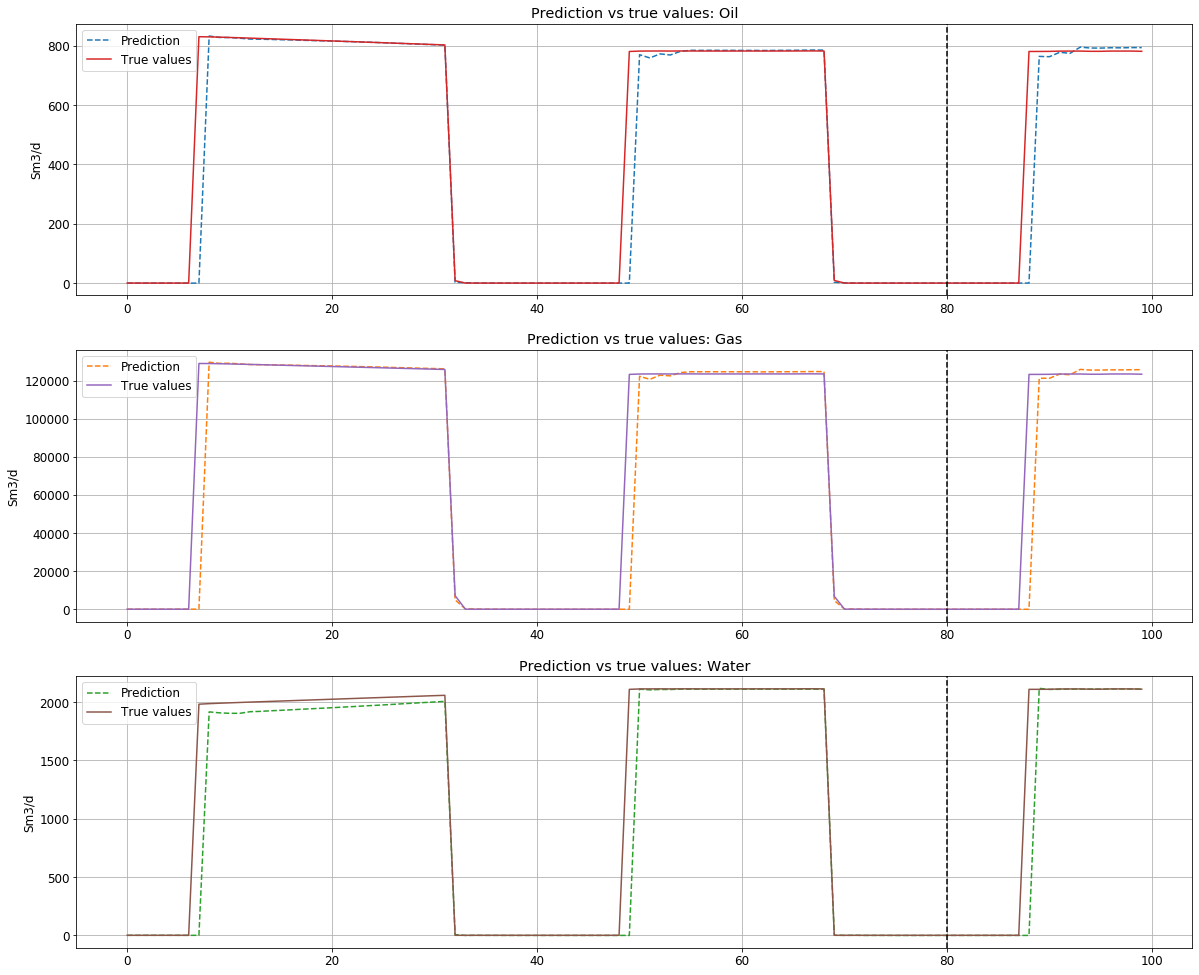

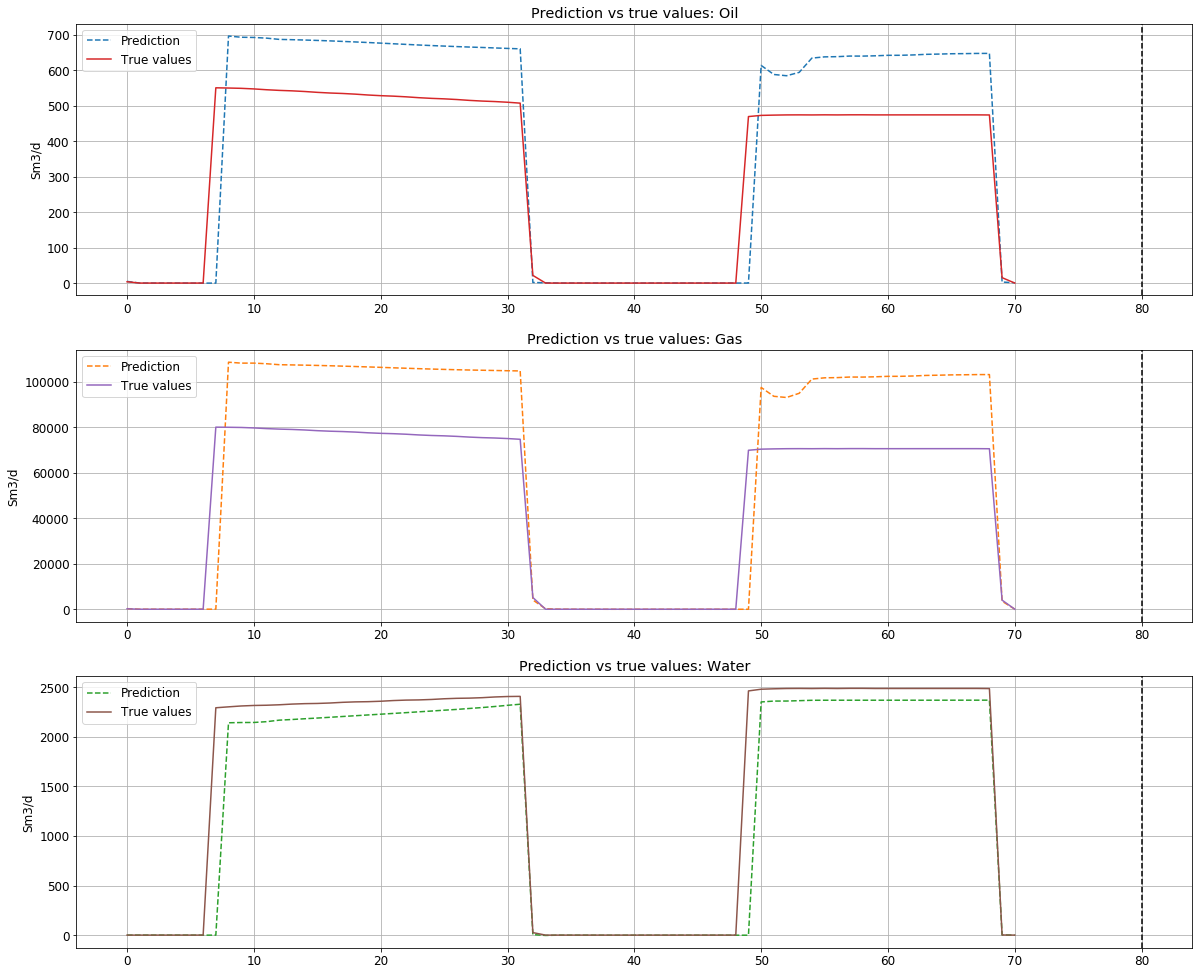

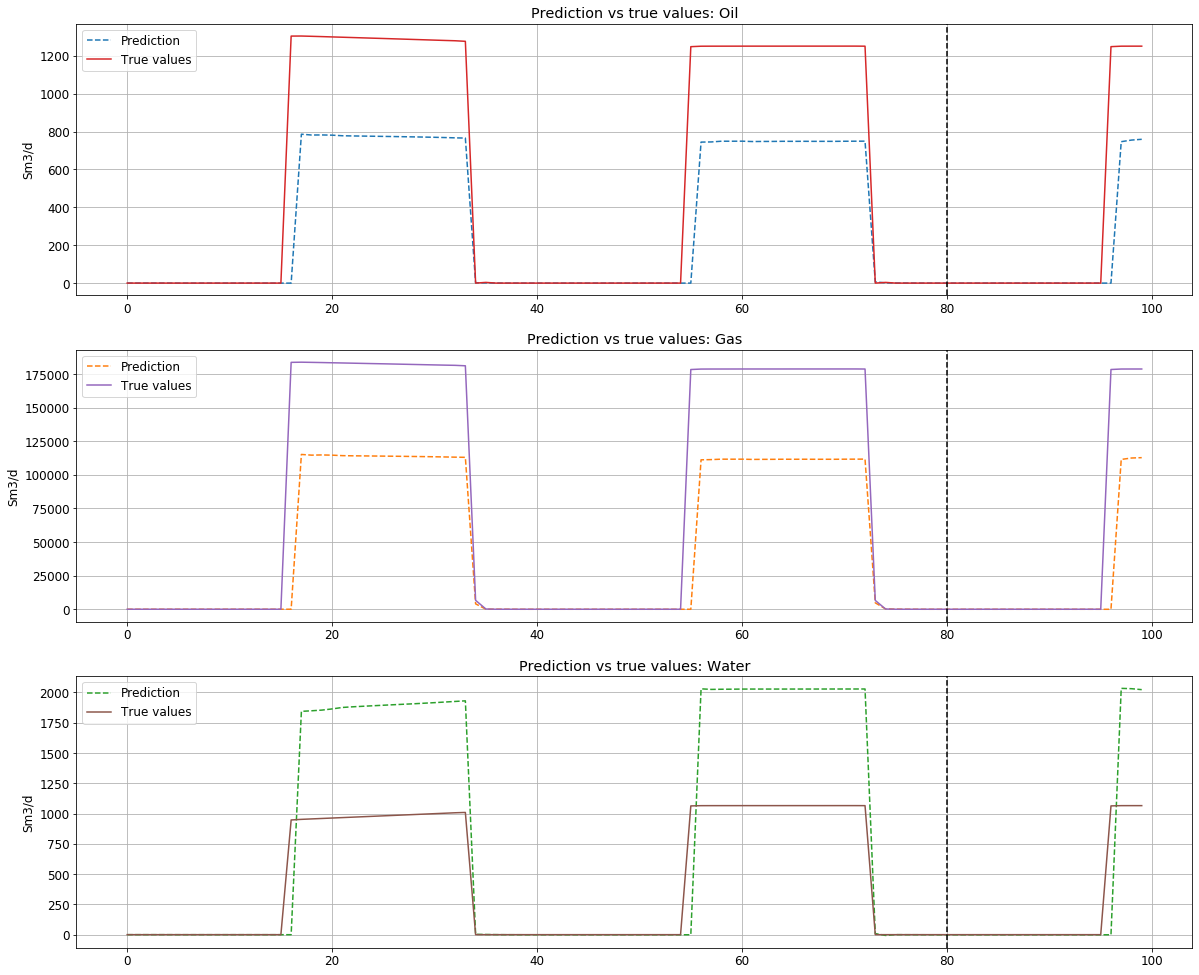

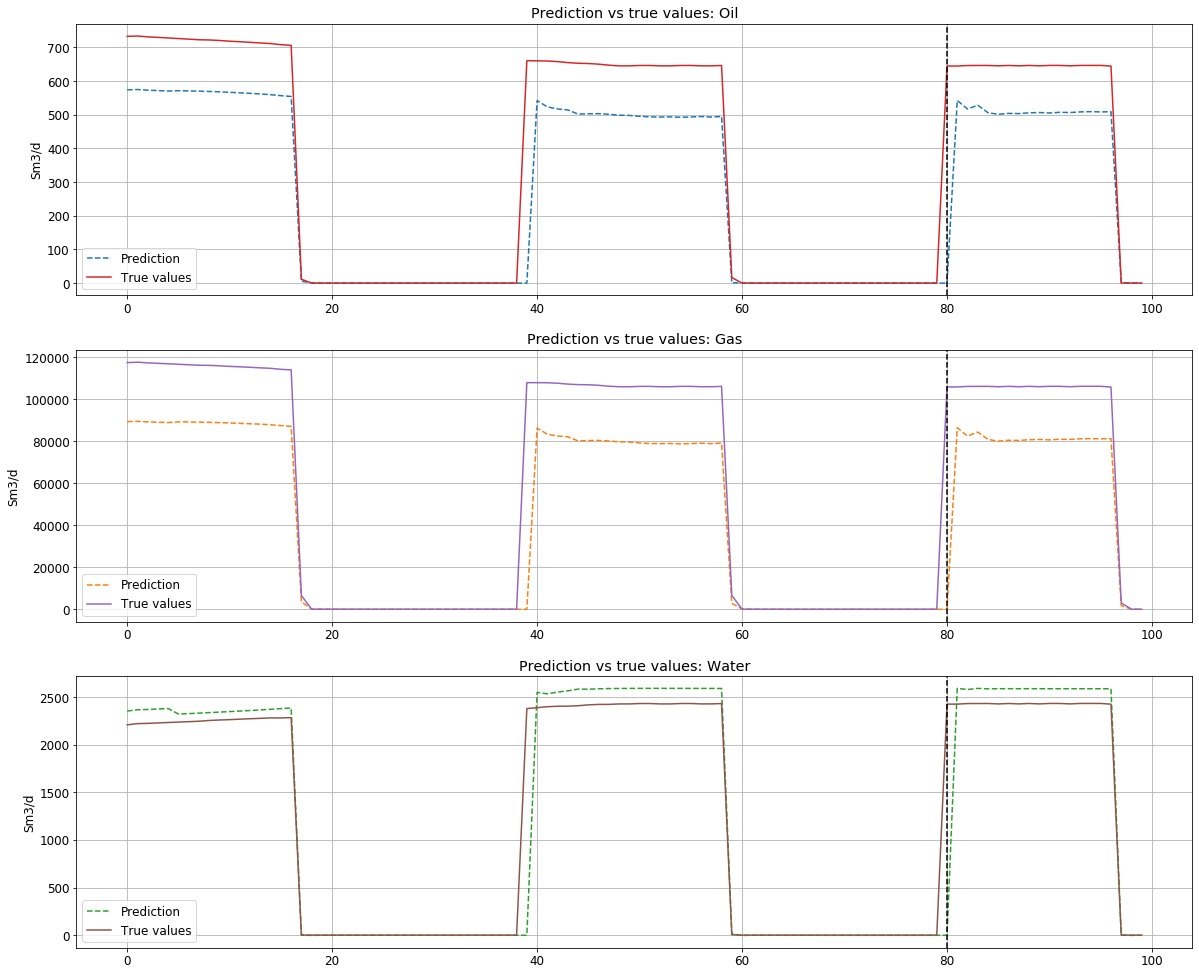

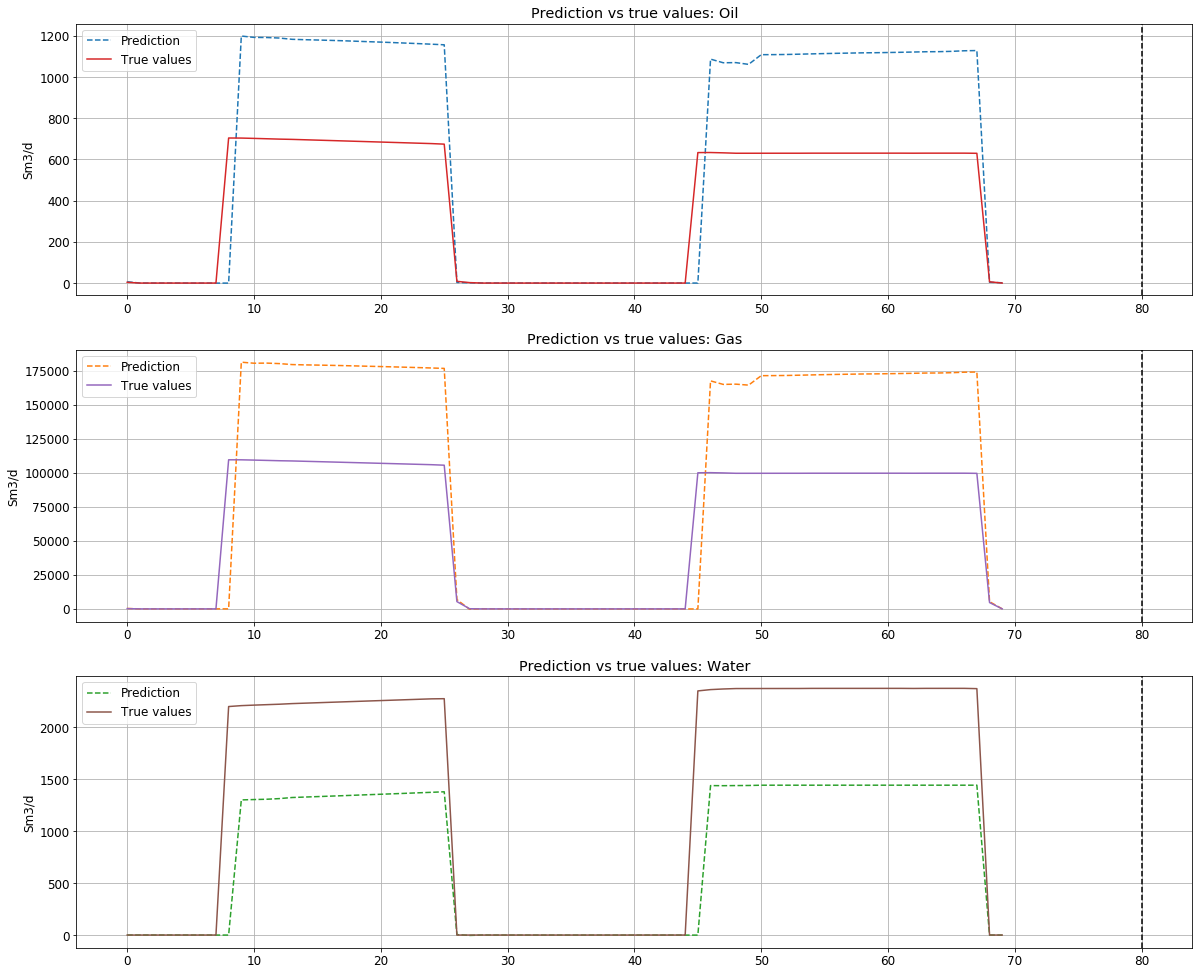

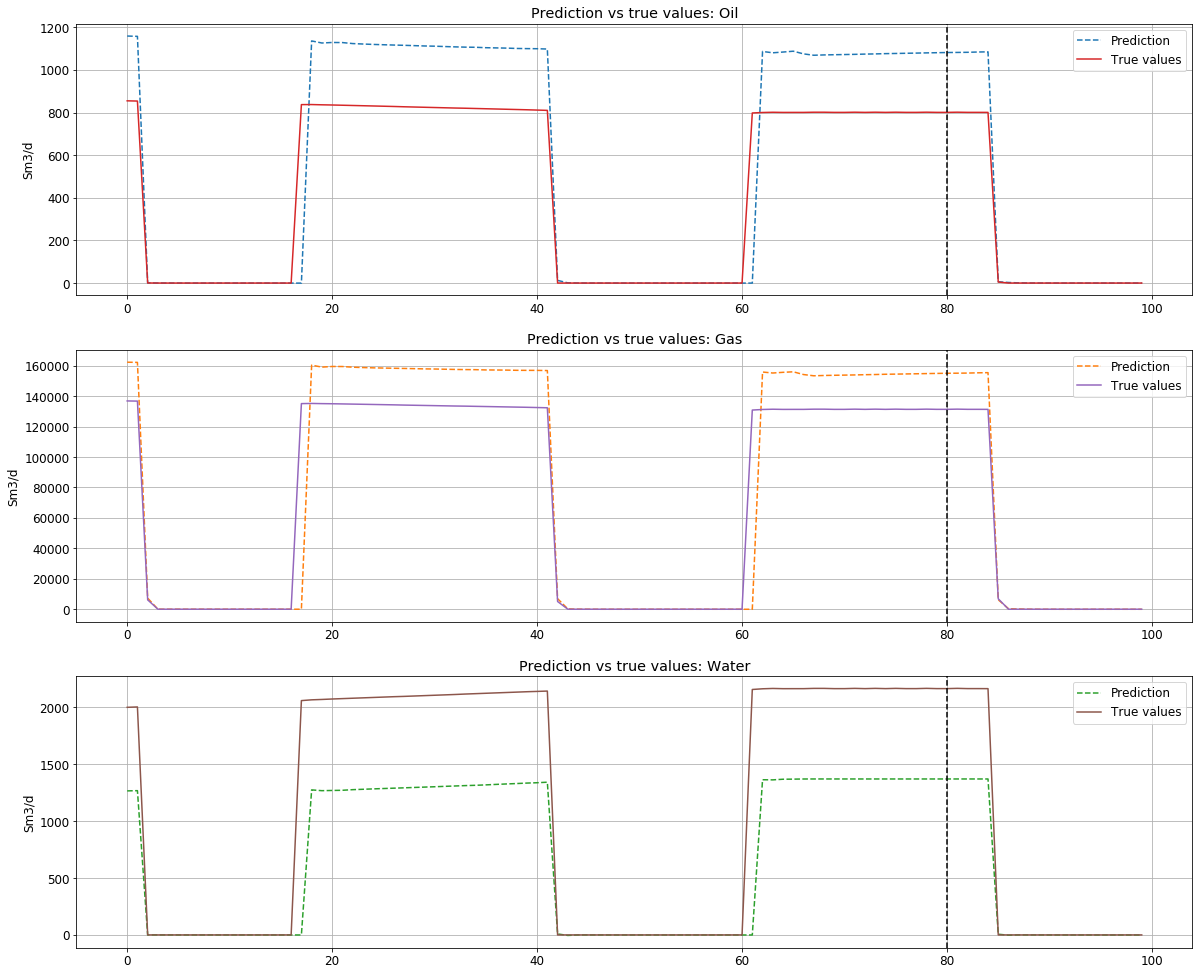

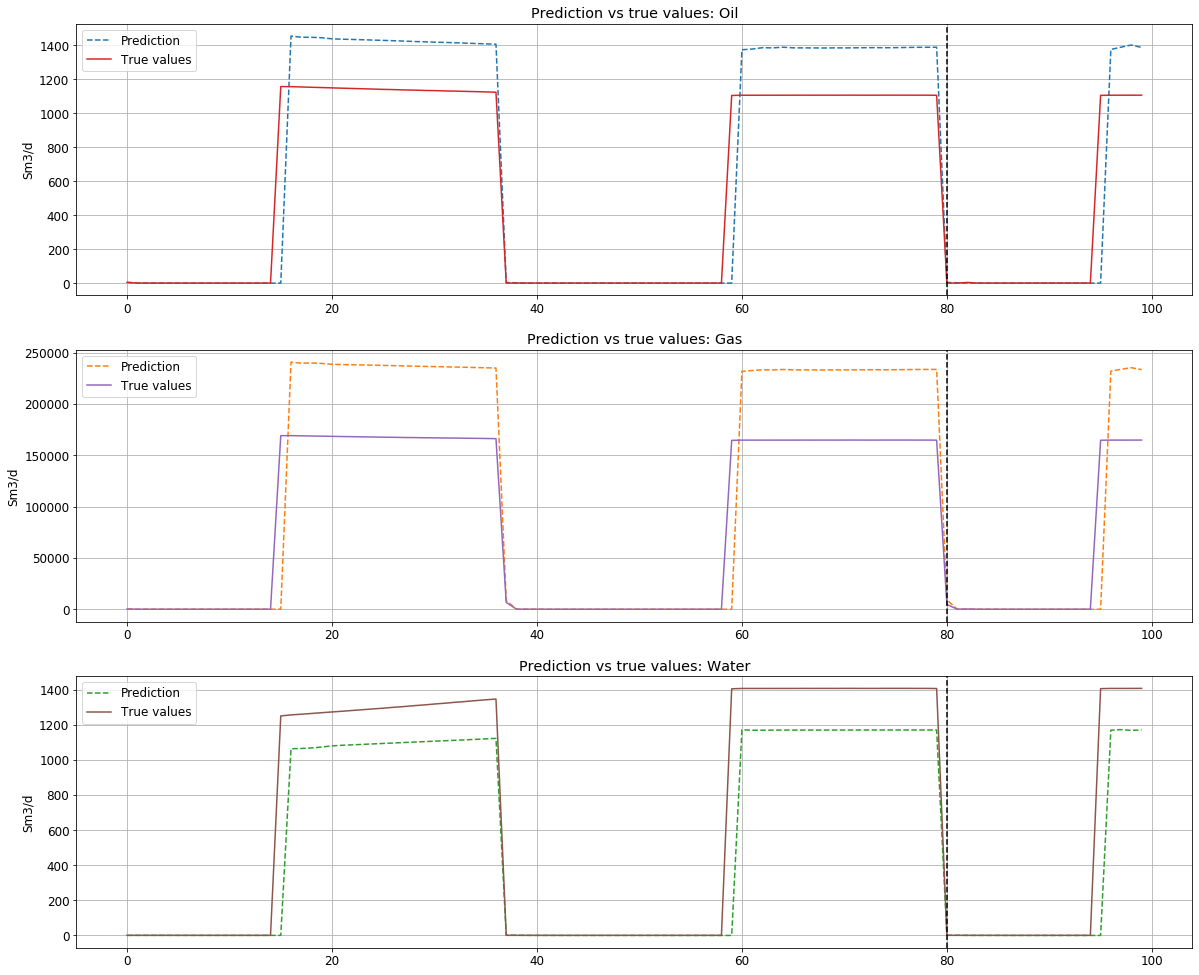